# __Income Prediction Challenge__

## Business Understanding

__Problem Statement__

Income inequality - when income is distributed in an uneven manner among a population - is a growing problem in developing nations across the world. With the rapid rise of AI and worker automation, this problem could continue to grow if steps are not taken to address the issue.

The objective of this challenge is to create a machine learning model to predict whether an individual earns above or below a certain amount.
This solution can potentially reduce the cost and improve the accuracy of monitoring key population indicators such as income level in between census years. This information will help policymakers to better manage and avoid income inequality globally.


### Objectives
- Develop a predictive model to categorize individuals based on income levels.
- Reduce the cost and improve the accuracy of monitoring key population indicators.
- Assist policymakers in managing and mitigating global income inequality.

## Data Understanding

### Data Collection
- Identify and acquire relevant datasets containing information on income and related features.
- Explore datasets capturing socio-economic factors, education, employment, and demographic information.

### Data Exploration
- Examine the structure of the dataset to understand its features and variables.
- Identify missing values, outliers, and potential data quality issues.
- Perform descriptive statistics to gain initial insights into the data.

## Data Preparation

### Data Cleaning
- Address missing values, outliers, and data quality issues to ensure data integrity.
- Standardize and normalize features as necessary.

### Feature Engineering
- Create new features that may enhance the predictive power of the model.
- Encode categorical variables and standardize numerical features.

## Modeling

### Model Selection
- Choose appropriate machine learning algorithms for binary classification.
- Consider algorithms such as Decision Trees, Random Forest, Support Vector Machines, or Gradient Boosting.

### Model Training
- Split the dataset into training and testing sets.
- Train the selected models using the training data.

### Model Evaluation
- Evaluate model performance using metrics such as accuracy, precision, recall, and F1 score.
- Fine-tune hyperparameters to optimize the model.

## Evaluation

### Model Interpretation
- Interpret the results to understand the factors influencing predictions.
- Identify the most significant features contributing to the prediction of income levels.

### Deployment
- Deploy the trained model for real-time predictions on new data.
- Integrate the model into a system accessible to policymakers for monitoring.

## Conclusion

### Lessons Learned
- Document challenges encountered during the project.
- Reflect on insights gained from data exploration and modeling.

### Recommendations
- Provide recommendations for ongoing monitoring and potential improvements.

By following the CRISP-DM framework, this project aims to develop a robust machine learning model to predict income levels, contributing to the global effort to manage and reduce income inequality.


## Import required modules

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Statistical Tests
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Splitting and Sampling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

# Machine Learning Models
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score,make_scorer, recall_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix

# Model saving/export
import pickle

# Miscellaneous
from termcolor import colored
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## __Data Understanding__

### Load Datasets

In [2]:
df_var = pd.read_csv('../Data/VariableDefinitions.csv')
df_var

,Column,Description
0,age,Age Of Individual
1,gender,Gender
2,education,Education
3,class,Class Of Worker
4,education_institute,Enrolled Educational Institution in last week
5,marital_status,Marital_Status
6,race,Race
7,is_hispanic,Hispanic Origin
8,employment_commitment,Full Or Part Time Employment Stat
9,unemployment_reason,Reason For Unemployment


__This definitions give a clear guidance and understanding on what to expect in each column__

In [3]:
# Reading train and test datasets
df = pd.read_csv('../Data/Train.csv')
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [4]:
df_test= pd.read_csv('../Data/Test.csv')
df_test.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,0,600,No,46,29,Transportation,38,Transportation and material moving,2,Householder,Householder,NaN,NaN,2,Joint both under 65,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,NaN,0,0,NaN,52,5,Manufacturing-durable goods,37,Machine operators assmblrs & inspctrs,4,Householder,Householder,NaN,NaN,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,El-Salvador,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,NaN,1,0,NaN,44,37,Business and repair services,4,Professional specialty,5,Householder,Householder,NaN,NaN,2,Joint both under 65,15024,0,500,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,NaN,0,0,NaN,8,0,Not in universe or children,0,NaN,6,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


# __Hypothesis__
Null Hypothesis (H0): There's no significant relationship between education level and the chance of making more money than a certain amount.

Alternative Hypothesis (H1): People with more education are much more likely to earn above that certain amount.

# __Research Questions__

1. **Income Distribution Overview:**
   - What is the distribution of income levels in the dataset, and what percentage of individuals exhibit incomes above or below a specific limit, considering the influencing factors? 

2. **Age and Income Correlation:**
   - Are particular age groups more likely to have higher incomes, and can we identify age-related patterns in income levels?

3. **Education and Income Link:**
   - Do higher education levels correspond to a higher likelihood of having incomes above the specified threshold? 

4. **Occupation and Income Relationship:**
   - What is the relationship between occupation and income categories in the dataset? 

5. **Industry and Income Relationship:**
   - What is the relationship between industry and income categories in the dataset?

6. **Gender-Based Income Disparity:**
   - Is there a significant gender-based income disparity in the dataset? 

7. **Employment Status Differences:**
   - Are there differences in employment status between the two income groups (above and below limit)? 

8. **Race and Ethnicity Analysis:**
   - How do race and ethnicity correlate with income levels in the dataset? 

# __EDA__

## Train  & Test Dataset

In [5]:
# Shape of the datasets
df.shape , df_test.shape

((209499, 43), (89786, 42))

In [6]:
# General info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [7]:
# General info of the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

In [8]:
# Statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [9]:
# Statistical summary of the dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,89786.0,34.586294,22.345868,0.00,15.000,33.000,50.000,90.0
employment_stat,89786.0,0.175762,0.554491,0.00,0.000,0.000,0.000,2.0
wage_per_hour,89786.0,54.338627,265.197545,0.00,0.000,0.000,0.000,9400.0
working_week_per_year,89786.0,23.223932,24.418207,0.00,0.000,8.000,52.000,52.0
industry_code,89786.0,15.377130,18.062988,0.00,0.000,0.000,33.000,51.0
occupation_code,89786.0,11.298432,14.444703,0.00,0.000,0.000,26.000,46.0
total_employed,89786.0,1.956419,2.364178,0.00,0.000,1.000,4.000,6.0
vet_benefit,89786.0,1.517998,0.849330,0.00,2.000,2.000,2.000,2.0
gains,89786.0,421.977925,4610.515599,0.00,0.000,0.000,0.000,99999.0
losses,89786.0,36.772648,268.401257,0.00,0.000,0.000,0.000,4608.0


This table summarizes the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each feature in the dataset.

### Checking missing values

                                Missing values  Ratio
veterans_admin_questionnaire            207415  99.01
unemployment_reason                     202979  96.89
education_institute                     196197  93.65
old_residence_reg                       193148  92.20
old_residence_state                     193148  92.20
is_labor_union                          189420  90.42
under_18_family                         151654  72.39
residence_1_year_ago                    106284  50.73
occupation_code_main                    105694  50.45
class                                   105245  50.24
migration_prev_sunbelt                   88452  42.22
migration_code_change_in_msa              1588   0.76
migration_code_move_within_reg            1588   0.76
migration_code_change_in_reg              1588   0.76
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


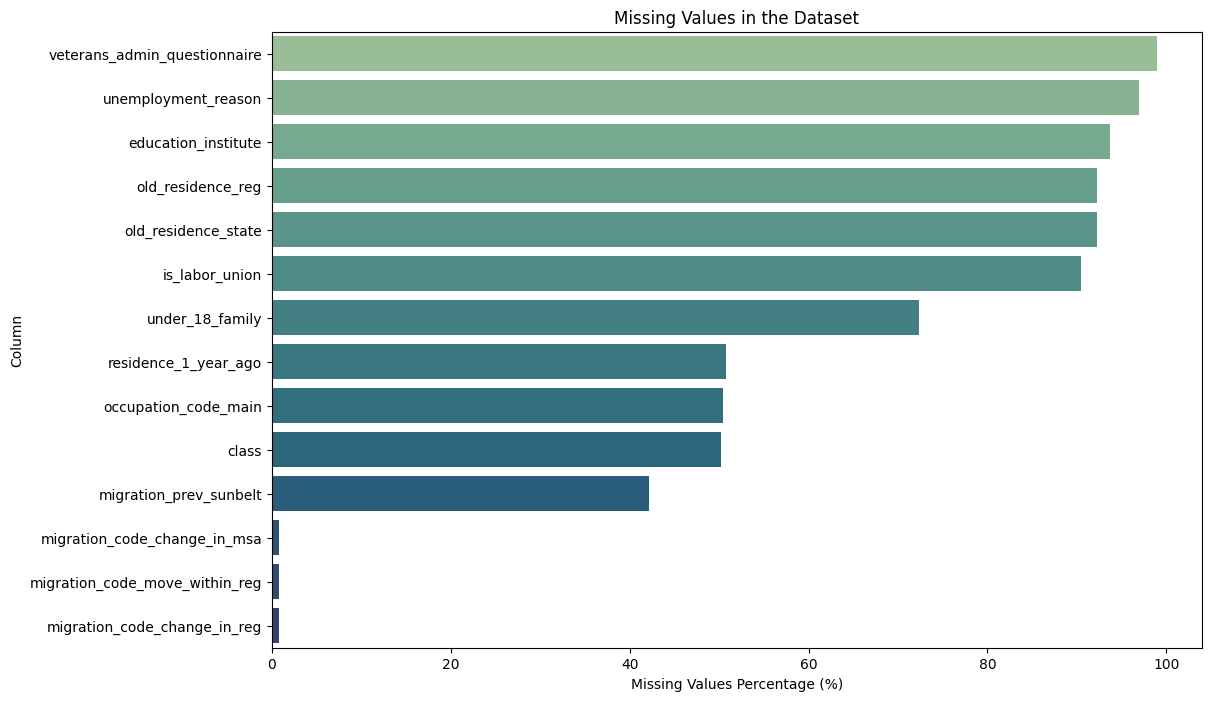

In [10]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_,2)], axis=1,keys=["Missing values", "Ratio"])
    missing_df= pd.DataFrame(missing_df)
    print(missing_df)
    print('~'*100)

    plt.figure(figsize=(12, 8))
    #missing_df = missing_values_analysis(df)
    ax = sns.barplot(x="Ratio", y=missing_df.index, data=missing_df, palette="crest")
    ax.set(xlabel="Missing Values Percentage (%)", ylabel="Column", 
        title=f"Missing Values in the Dataset")
    plt.show()
    
missing_values_analysis(df)    

                                Missing values  Ratio
veterans_admin_questionnaire             88859  98.97
unemployment_reason                      87106  97.02
education_institute                      84170  93.75
old_residence_reg                        82670  92.07
old_residence_state                      82670  92.07
is_labor_union                           81322  90.57
under_18_family                          64972  72.36
residence_1_year_ago                     45597  50.78
occupation_code_main                     45273  50.42
class                                    45079  50.21
migration_prev_sunbelt                   37724  42.02
migration_code_change_in_msa               651   0.73
migration_code_move_within_reg             651   0.73
migration_code_change_in_reg               651   0.73
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


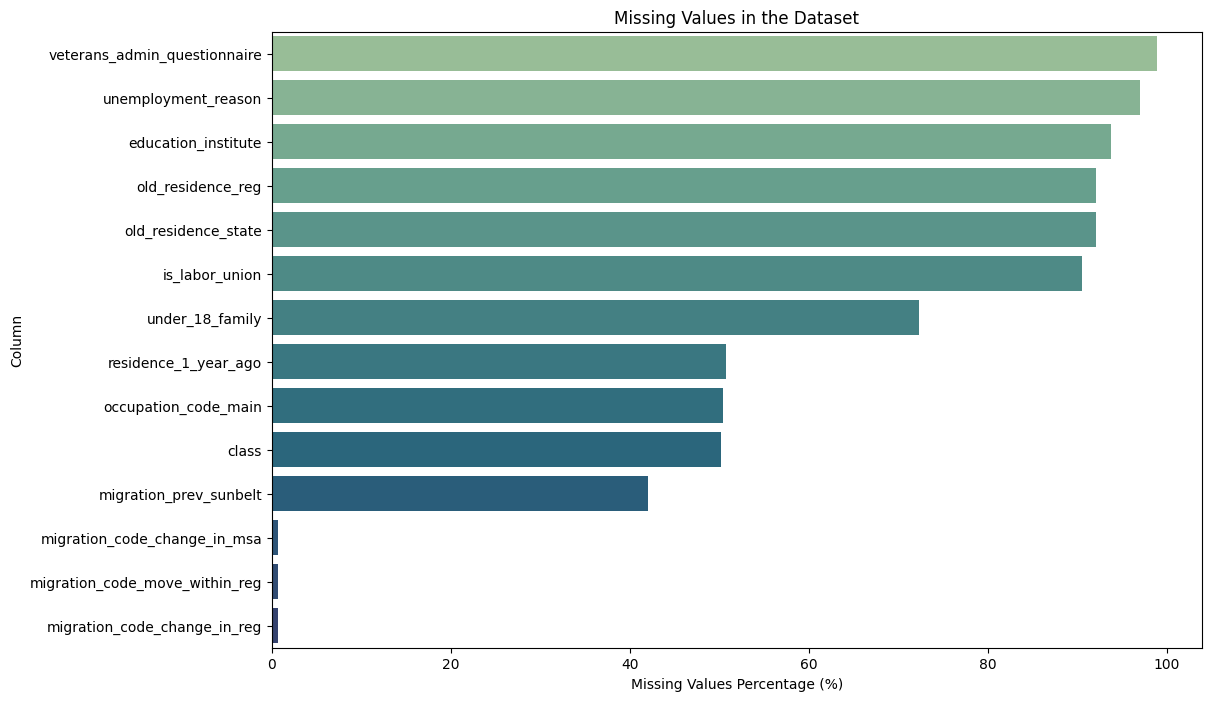

In [11]:
missing_values_analysis(df_test) 

In [12]:
# Define a function to print unique values for categorical columns
def print_unique_categorical(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is of type 'object' (categorical)
            underline = '~' * len(f"Column: {column}")
            print(f"Column: {column}")
            print(underline)
            unique_values = df[column].unique()
            print(f"Unique Values: {unique_values}\n")
            
print_unique_categorical(df)

Column: ID
~~~~~~~~~~
Unique Values: ['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']

Column: gender
~~~~~~~~~~~~~~
Unique Values: [' Female' ' Male']

Column: education
~~~~~~~~~~~~~~~~~
Unique Values: [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']

Column: class
~~~~~~~~~~~~~
Unique Values: [nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Without pay' ' Never worked']

Column: education_institute
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unique Values: [nan ' High school

In [13]:
print_unique_categorical(df_test)

Column: ID
~~~~~~~~~~
Unique Values: ['ID_TZ209499' 'ID_TZ209500' 'ID_TZ209501' ... 'ID_TZ299282' 'ID_TZ299283'
 'ID_TZ299284']

Column: gender
~~~~~~~~~~~~~~
Unique Values: [' Male' ' Female']

Column: education
~~~~~~~~~~~~~~~~~
Unique Values: [' High school graduate' ' 5th or 6th grade' ' Bachelors degree(BA AB BS)'
 ' 9th grade' ' Children' ' Some college but no degree' ' 11th grade'
 ' 10th grade' ' 7th and 8th grade' ' Associates degree-occup /vocational'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' 12th grade no diploma'
 ' Associates degree-academic program' ' Less than 1st grade'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 1st 2nd 3rd or 4th grade'
 ' Doctorate degree(PhD EdD)']

Column: class
~~~~~~~~~~~~~
Unique Values: [' Private' nan ' Federal government' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Never worked' ' Without pay']

Column: education_institute
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unique Values: [nan ' Hig

## __Handling Data Inconsistencies__

In [14]:
def clean_strip(df):
    df = df.apply(lambda x : x.str.strip() if x.dtype == 'object' else x)
    df = df.replace('?', np.nan)
    return df
df = clean_strip(df)

In [15]:
df_test = clean_strip(df_test)

In [16]:
def identify_columns_to_drop(df, threshold=0.70):
    columns_to_drop = []
    for col in df.columns:
        missing_percentage = df[col].isnull().sum() / len(df)
        if missing_percentage > threshold:
            columns_to_drop.append(col)

    return columns_to_drop

result_train = identify_columns_to_drop(df)
print("Columns to drop in the train dataset:", result_train)

columns_to_drop = identify_columns_to_drop(df)
df.drop(columns=columns_to_drop, inplace=True)

Columns to drop in the train dataset: ['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']


In [17]:
result_test = identify_columns_to_drop(df_test)
print("Columns to drop in the train dataset:", result_test)

Columns to drop in the train dataset: ['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']


In [18]:
columns_to_drop = identify_columns_to_drop(df_test)
df_test.drop(columns=columns_to_drop, inplace=True)

                                Missing values  Ratio
migration_code_change_in_msa            106284  50.73
migration_code_move_within_reg          106284  50.73
migration_code_change_in_reg            106284  50.73
residence_1_year_ago                    106284  50.73
occupation_code_main                    105694  50.45
class                                   105245  50.24
country_of_birth_father                   7181   3.43
country_of_birth_mother                   6516   3.11
country_of_birth_own                      3667   1.75
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


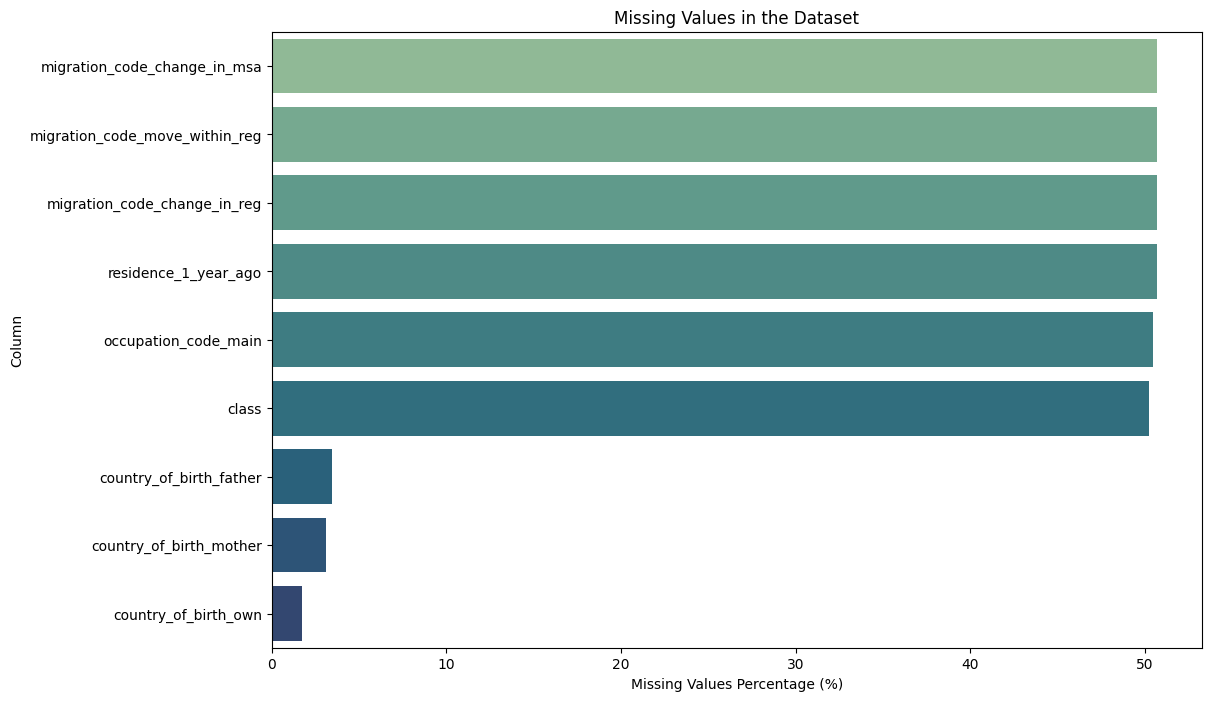

In [19]:
missing_values_analysis(df)

                                Missing values  Ratio
migration_code_change_in_msa             45597  50.78
migration_code_move_within_reg           45597  50.78
migration_code_change_in_reg             45597  50.78
residence_1_year_ago                     45597  50.78
occupation_code_main                     45273  50.42
class                                    45079  50.21
country_of_birth_father                   2961   3.30
country_of_birth_mother                   2675   2.98
country_of_birth_own                      1490   1.66
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


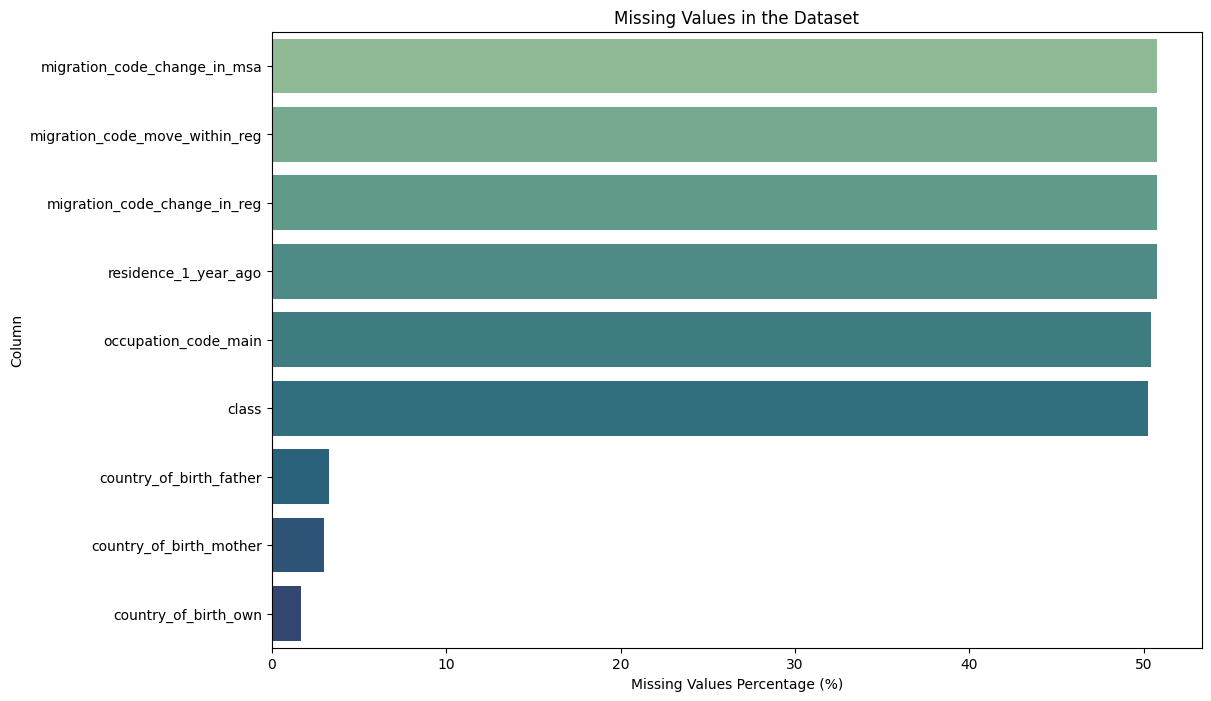

In [20]:
missing_values_analysis(df_test)

In [21]:
df["class"].unique()

array([nan, 'Federal government', 'Private', 'Local government',
       'Self-employed-incorporated', 'Self-employed-not incorporated',
       'State government', 'Without pay', 'Never worked'], dtype=object)

In [22]:
df["class"].value_counts()

class
Private                           75617
Self-employed-not incorporated     8957
Local government                   8093
State government                   4480
Self-employed-incorporated         3444
Federal government                 3047
Never worked                        449
Without pay                         167
Name: count, dtype: int64

In [23]:
# Filter rows where age is less than 18
filtered_df = df[df["age"] < 18]
filtered_df

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
3,ID_TZ0003,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
11,ID_TZ0011,4,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,1944.73,Below limit
13,ID_TZ0013,16,Female,9th grade,NaN,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,2684.64,Below limit
16,ID_TZ0016,5,Female,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1340.44,Below limit
29,ID_TZ0029,14,Male,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Secondary individual,Nonrelative of householder,0,Nonfiler,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1652.34,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209477,ID_TZ9998,8,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,5585.64,Below limit
209481,ID_TZ99983,11,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Grandchild <18 never marr not in subfamily,Other relative of householder,0,Nonfiler,0,0,0,Native,94,US,US,US,MSA to MSA,Different state in South,Different state same division,No,3245.09,Below limit
209483,ID_TZ99985,11,Male,Children,NaN,Never married,White,Mexican-American,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,US,Nicaragua,Mexico,NaN,NaN,NaN,NaN,896.19,Below limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,Never married,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,2170.60,Below limit


In [24]:
# Introduce a new variable "employment_status" in the "age" column
df['class'] = np.where(df['age'] < 18, 'Never worked', df['class'])
df.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,NaN,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Never worked,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit


In [25]:
df["class"].unique()

array([nan, 'Federal government', 'Never worked', 'Private',
       'Local government', 'Self-employed-incorporated',
       'Self-employed-not incorporated', 'State government',
       'Without pay'], dtype=object)

In [26]:
df["class"].value_counts()

class
Private                           73388
Never worked                      58780
Self-employed-not incorporated     8827
Local government                   8001
State government                   4459
Self-employed-incorporated         3404
Federal government                 3035
Without pay                         146
Name: count, dtype: int64

In [27]:
def impute_with_mode(df, column_names):
    for column_name in column_names:
        imputation_value = df[column_name].mode()
        df[column_name].fillna(imputation_value[0], inplace=True)

cols = ['class', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_own']

# Impute columns in the train dataset
impute_with_mode(df, cols)

# Impute columns in the test dataset
impute_with_mode(df_test, cols)

In [28]:
df['occupation_code_main'].unique()

array([nan, 'Adm support including clerical', 'Other service',
       'Executive admin and managerial', 'Sales',
       'Machine operators assmblrs & inspctrs',
       'Precision production craft & repair', 'Professional specialty',
       'Handlers equip cleaners etc',
       'Transportation and material moving',
       'Farming forestry and fishing', 'Private household services',
       'Technicians and related support', 'Protective services',
       'Armed Forces'], dtype=object)

In [29]:
df['occupation_code_main'].value_counts()

occupation_code_main
Adm support including clerical           15351
Professional specialty                   14544
Executive admin and managerial           13107
Other service                            12856
Sales                                    12487
Precision production craft & repair      11207
Machine operators assmblrs & inspctrs     6650
Handlers equip cleaners etc               4340
Transportation and material moving        4244
Farming forestry and fishing              3273
Technicians and related support           3136
Protective services                       1700
Private household services                 878
Armed Forces                                32
Name: count, dtype: int64

In [30]:
df["occupation_code"].unique()

array([ 0, 26, 31,  2, 17, 36, 33,  8, 10, 40, 29, 39, 23, 34, 43, 38,  3,
       35, 19, 25, 27, 24, 30,  1, 32, 15,  5, 28, 37, 12,  4, 16,  7, 14,
       44, 18, 13,  9, 42, 21, 41, 22, 11, 45,  6, 20, 46], dtype=int64)

In [31]:
# Filter rows where age is less than 18 and class is missing
missing_occupation = df[(df["occupation_code"] == 0) & df["occupation_code_main"].isnull()]
missing_occupation.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,NaN,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
3,ID_TZ0003,2,Female,Children,Never worked,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit
8,ID_TZ0008,73,Female,7th and 8th grade,Private,Married-civilian spouse present,Black,All other,Not in labor force,0,0,1,0,Not in universe or children,0,NaN,3,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1267.30,Below limit


In [32]:
# Filter rows where df["occupation_code"] != 0) and class is missing
not_missing_occupation = df[(df["occupation_code"] != 0) & df["occupation_code_main"].isnull()]
not_missing_occupation.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit


In [33]:
df['occupation_code_main'].fillna('Unknown', inplace=True)
df_test['occupation_code_main'].fillna('Unknown', inplace=True)

In [34]:
# List of columns to drop
columns_to_drop = ['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago']

df.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)

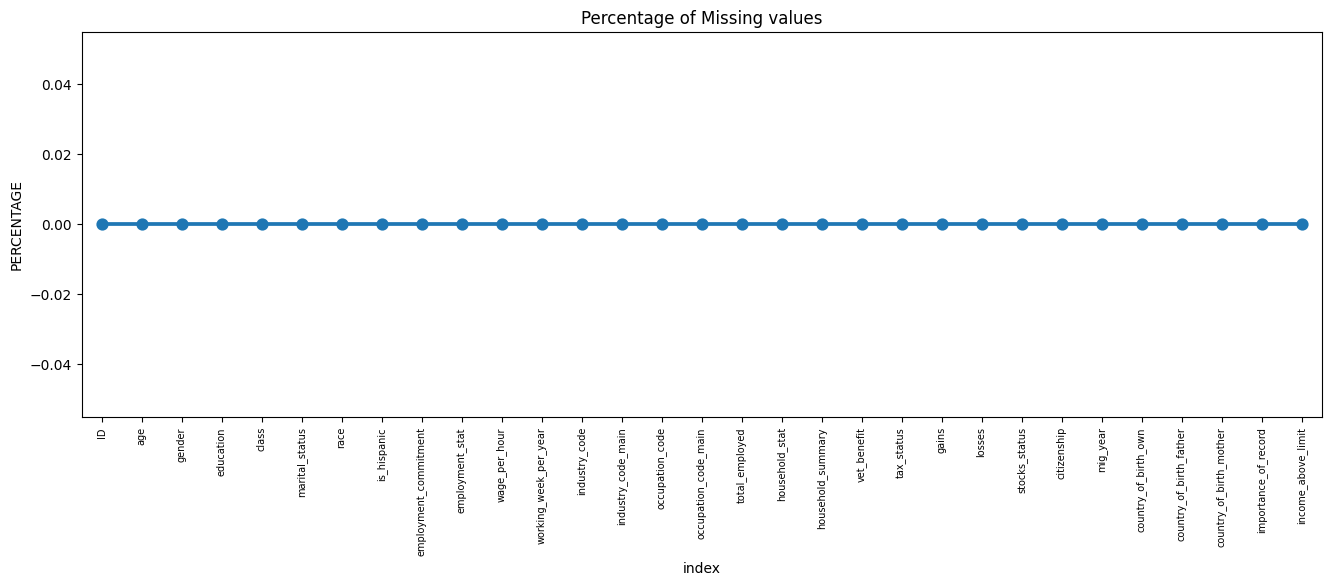

In [35]:
def visualize_missing_percentage(df):
    missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()

    # Plot the percentage of missing values
    plt.figure(figsize=(16, 5))
    ax = sns.pointplot(x='index', y=0, data=missing)
    plt.xticks(rotation=90, fontsize=7)
    plt.title("Percentage of Missing values")
    plt.ylabel("PERCENTAGE")
    plt.show()
    
visualize_missing_percentage(df)

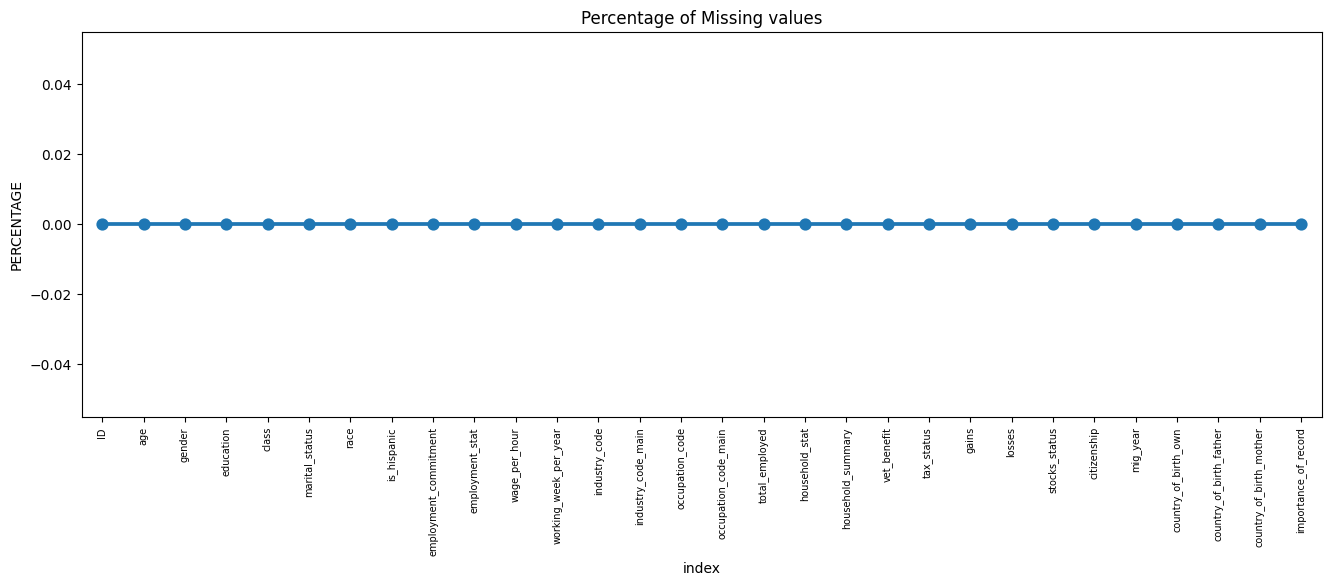

In [36]:
visualize_missing_percentage(df_test)

__All missing values have been handled in both datasets__

In [37]:
df['is_hispanic'].unique()

array(['All other', 'Mexican-American', 'Central or South American',
       'Mexican (Mexicano)', 'Puerto Rican', 'Other Spanish', 'NA',
       'Cuban', 'Do not know', 'Chicano'], dtype=object)

In [38]:
# Replacing 'NA' values with 'Do not know'
df['is_hispanic'] = df['is_hispanic'].replace('NA', 'Do not know')
df_test['is_hispanic'] = df_test['is_hispanic'].replace('NA', 'Do not know')

In [39]:
df['education'].unique()

array(['High school graduate', '12th grade no diploma', 'Children',
       'Bachelors degree(BA AB BS)', '7th and 8th grade', '11th grade',
       '9th grade', 'Masters degree(MA MS MEng MEd MSW MBA)',
       '10th grade', 'Associates degree-academic program',
       '1st 2nd 3rd or 4th grade', 'Some college but no degree',
       'Less than 1st grade', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       'Doctorate degree(PhD EdD)'], dtype=object)

In [40]:
df['citizenship'].unique()

array(['Native', 'Foreign born- Not a citizen of U S',
       'Foreign born- U S citizen by naturalization',
       'Native- Born abroad of American Parent(s)',
       'Native- Born in Puerto Rico or U S Outlying'], dtype=object)

In [41]:
def map_categories(df):
    # Mapping for education categories
    education_mapping = {
        'Elementary': ['less than 1st grade', '1st 2nd 3rd or 4th grade', '5th or 6th grade'],
        'Middle School': ['7th and 8th grade'],
        'High School': ['9th grade', '10th grade', '11th grade', '12th grade no diploma', 'high school graduate'],
        'College Dropout': ['some college but no degree'],
        'Associates Degree': ['associates degree-occup /vocational', 'associates degree-academic program'],
        'Bachelors Degree': ['bachelors degree(ba ab bs)'],
        'Masters': ['masters degree(ma ms meng med msw mba)'],
        'Professional Degree': ['prof school degree (md dds dvm llb jd)'],
        'Doctorate': ['doctorate degree(phd edd)'],
        'Children': ['children'],
    }
    # Map citizenship names to new categories
    citizenship_mapping = {
        'Foreign born- Not a citizen of U S': 'foreigner',
        'Foreign born- U S citizen by naturalization': 'citizen',
        'Native': 'citizen',
        'Native- Born abroad of American Parent(s)': 'citizen',
        'Native- Born in Puerto Rico or U S Outlying': 'citizen'
    }

    # Update the 'citizenship' column with the new categories
    df['citizenship'] = df['citizenship'].map(citizenship_mapping)

    df['citizenship'].unique()
    
    # Apply the mapping to the 'education' column
    df['education'] = df['education'].apply(lambda x: next((k for k, v in education_mapping.items() if x.lower() in v), 'Unknown'))

    df['education'].unique()
    
    return df
df = map_categories(df)

In [42]:
df_test = map_categories(df_test)

# __Univariate, Bivariate and Multivariate Analysis__
## Univariate Analysis

In [43]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [44]:
income_df = df['income_above_limit'].value_counts()
income_pct_df = df['income_above_limit'].value_counts(normalize=True)

result_df = pd.concat([income_df, income_pct_df], axis=1)
result_df.columns = ['Count', 'Percentage']

result_df

,Count,Percentage
income_above_limit,,
Below limit,196501,0.937957
Above limit,12998,0.062043


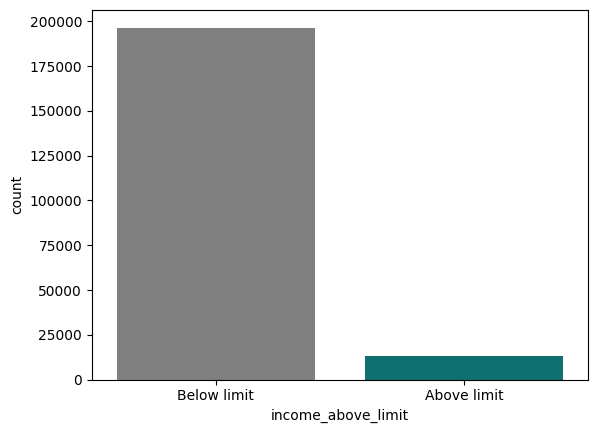

In [45]:
sns.countplot(data=df, x='income_above_limit', palette=['grey', 'teal'])
plt.show()

__Class Imbalance Issue__

Clearly we have a highly imbalanced dataset available with us and hence we need to perform steps to mitigate the imbalance accordingly. The following methods could be used:- 
1. Downsample the majority class (Here majority class is 'Below limit') 
2. Upsample the minority class (Here, minority class is 'Above limit') 
3. Use class weights while performing model development <br>
Reference : https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html



In [46]:
gender_df = df['gender'].value_counts()
gender_pct_df = df['gender'].value_counts(normalize=True)

results_df = pd.concat([gender_df, gender_pct_df], axis=1)
results_df.columns = ['Count', 'Percentage']

results_df

,Count,Percentage
gender,,
Female,108784,0.519258
Male,100715,0.480742


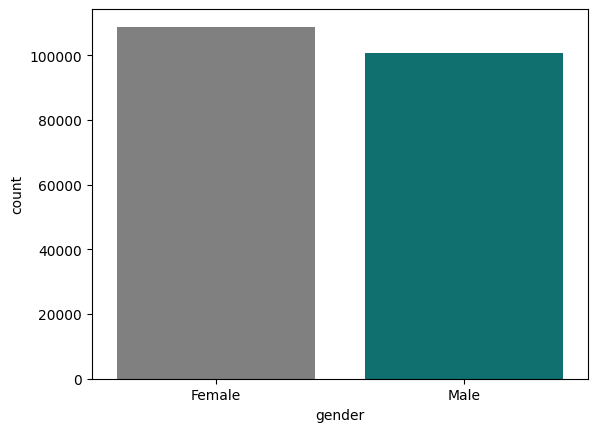

In [47]:
sns.countplot(data=df, x='gender', palette=['grey', 'teal'])
plt.show()

__There are more females than males in the dataset__

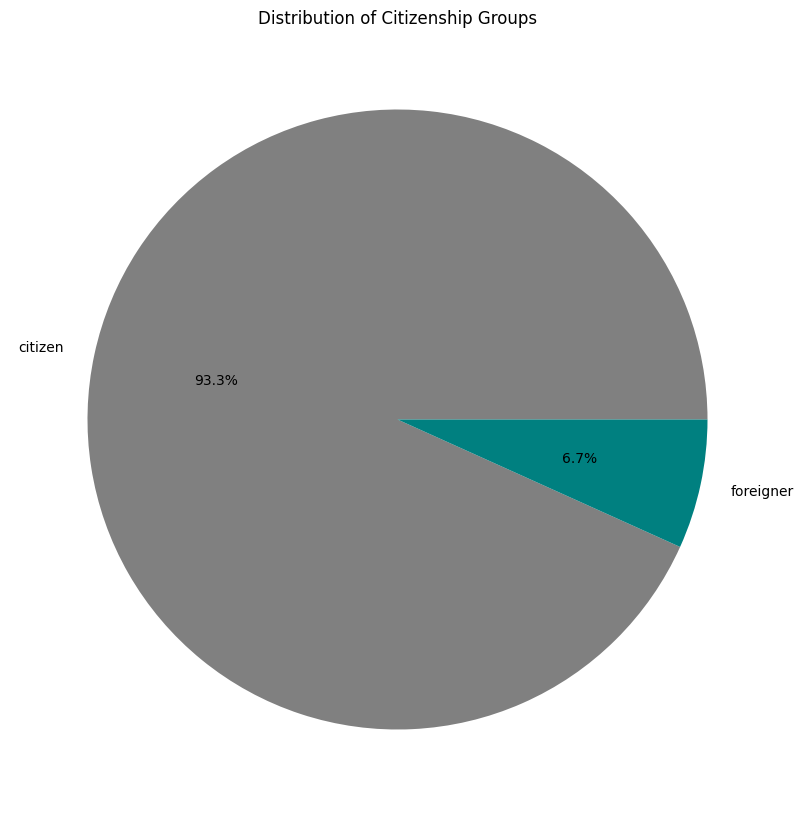

In [48]:
# Plot a pie chart with viridis blue and green
palette = ['grey', 'teal']
plt.figure(figsize=(10, 12))
plt.pie(df['citizenship'].value_counts(),labels=df['citizenship'].value_counts().index, autopct='%1.1f%%', colors=palette)
plt.title('Distribution of Citizenship Groups')
plt.show()

__Majority of the workers are legal USA citizens, while 5.9% makes up foreigners__

## __Bivariate analysis__

### Gender vs Income

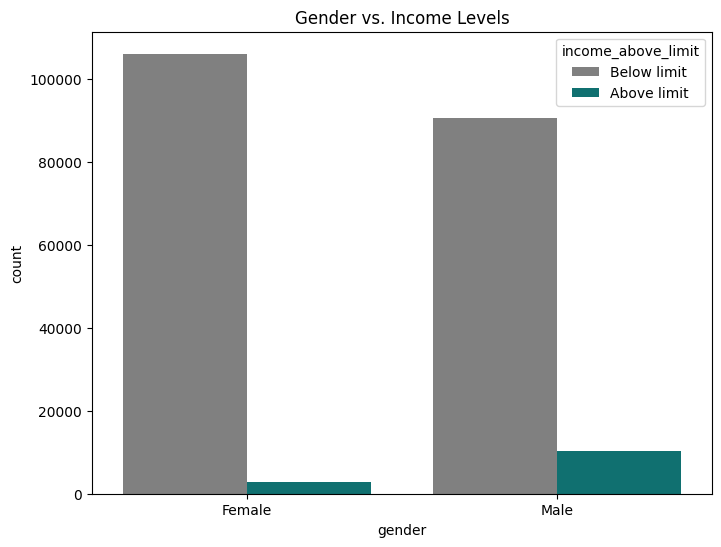

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='gender', hue='income_above_limit', palette=['grey', 'teal'])
plt.title('Gender vs. Income Levels')
plt.show()

### Citizenship vs Income

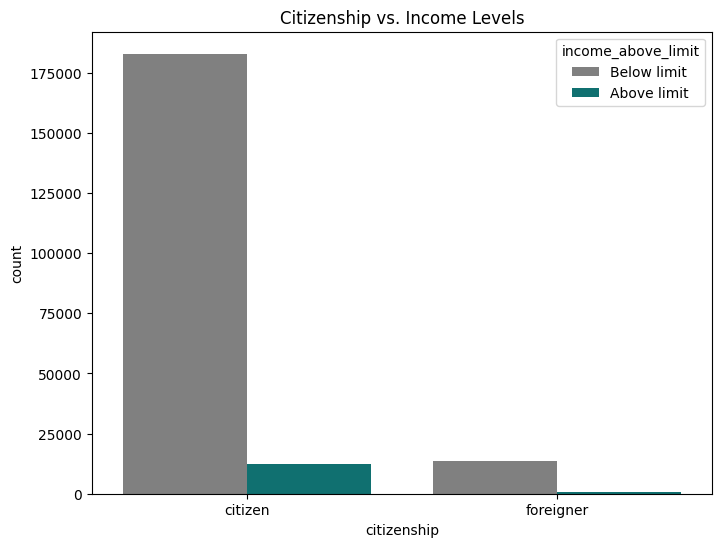

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x='citizenship', hue='income_above_limit', data=df, palette=['grey', 'teal'])
plt.title('Citizenship vs. Income Levels')
plt.show()

### Age vs Income

In [51]:
df['age'].unique()

array([79, 65, 21,  2, 70, 45, 53, 22, 73, 30,  4, 16, 43, 36,  5, 88, 40,
       47, 59, 69, 50, 27, 39, 85, 29, 41, 14, 33, 67, 52, 11,  9, 13, 19,
       26, 23, 37, 58, 63, 46, 62, 28, 31,  3, 18, 78, 15, 38,  7, 35,  1,
       20,  0, 48, 24, 56, 25,  8, 66, 71, 32, 75, 51, 10, 44, 42, 55, 74,
       77, 34, 80, 17, 83, 86, 12, 68, 60, 57, 64, 72, 90, 61, 82,  6, 84,
       49, 76, 54, 89, 81, 87], dtype=int64)

In [52]:
df['age'].min()

0

In [53]:
df['age'].max()

90

In [54]:
# Define age bins
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ["{0} - {1}".format(age_bins[i], age_bins[i + 1] - 1) for i in range(len(age_bins) - 1)]

# Create a new column 'Age Group' in your DataFrame
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Display the counts of each age group
df['age_group'].value_counts()

age_group
0 - 19     63770
20 - 39    63436
40 - 59    48743
60 - 79    27862
80 - 99     5688
Name: count, dtype: int64

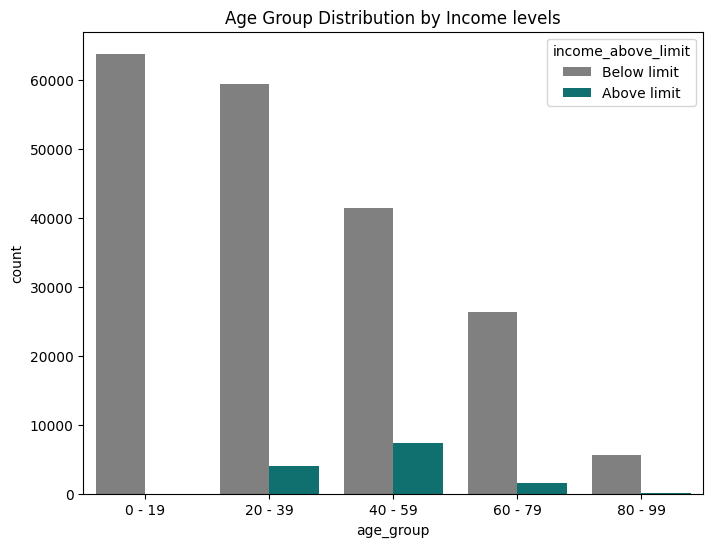

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='age_group', hue='income_above_limit' ,palette=['grey', 'teal'])
plt.title('Age Group Distribution by Income levels')
plt.show()

### Education vs Income

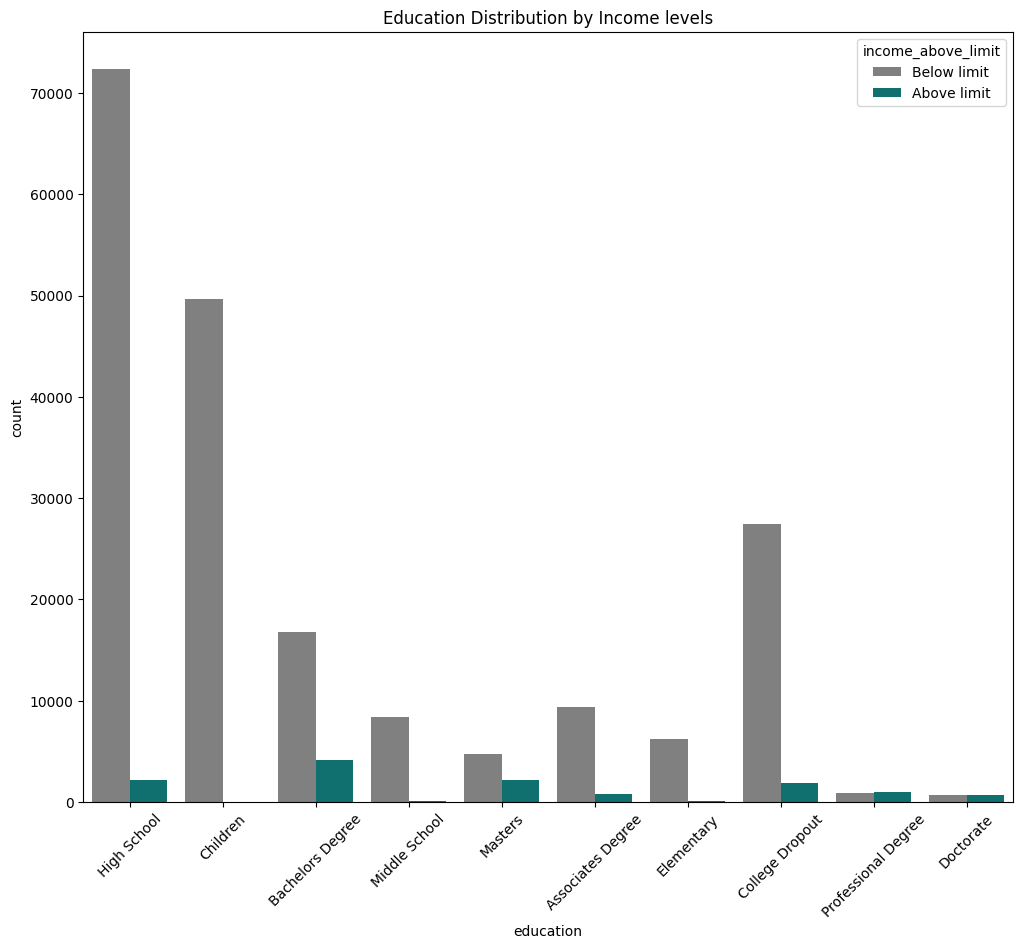

In [56]:
# Analysis for education column in relation to income column
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='education', hue='income_above_limit' ,palette=['grey', 'teal'])
plt.title('Education Distribution by Income levels')
plt.xticks(rotation=45)
plt.show()

### WorkClass vs Income

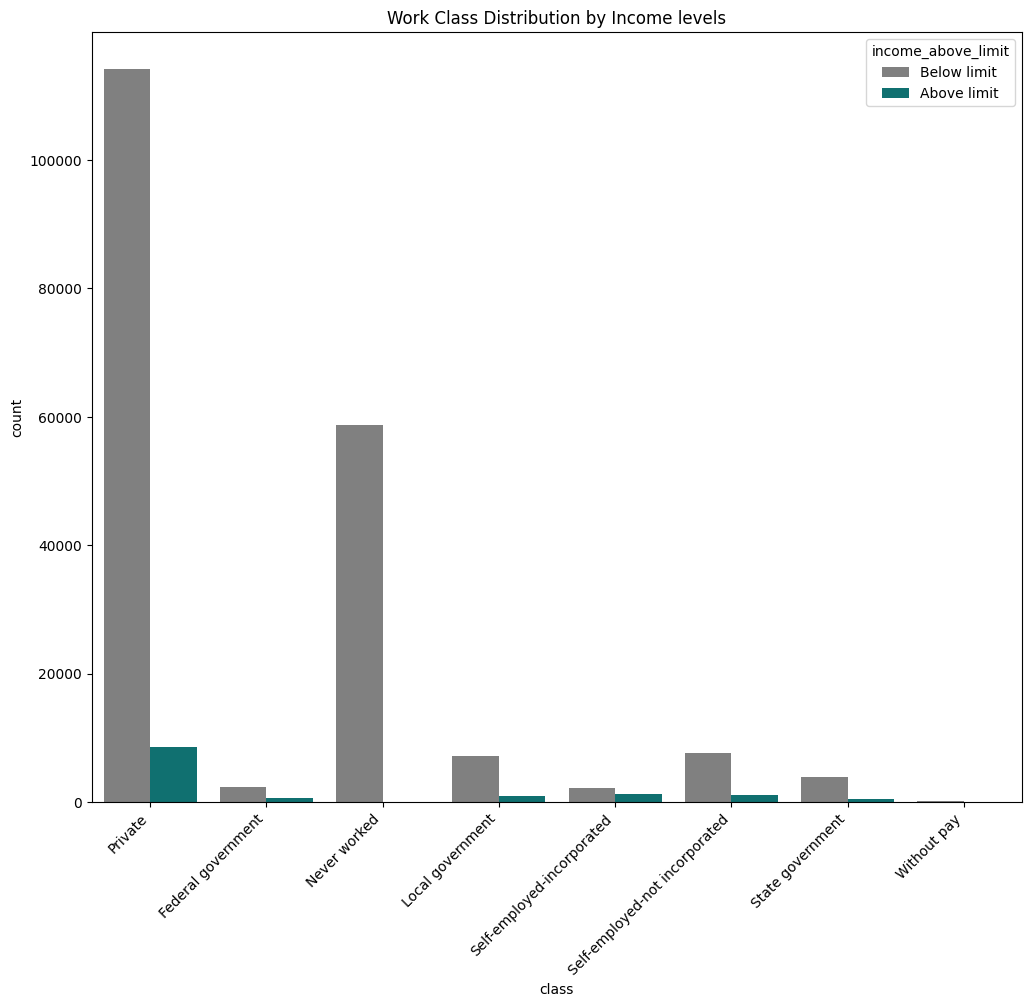

In [57]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='class', hue='income_above_limit' ,palette=['grey', 'teal'])
plt.title('Work Class Distribution by Income levels')
plt.xticks(rotation=45, ha='right')
plt.show()

### Occupation vs Income

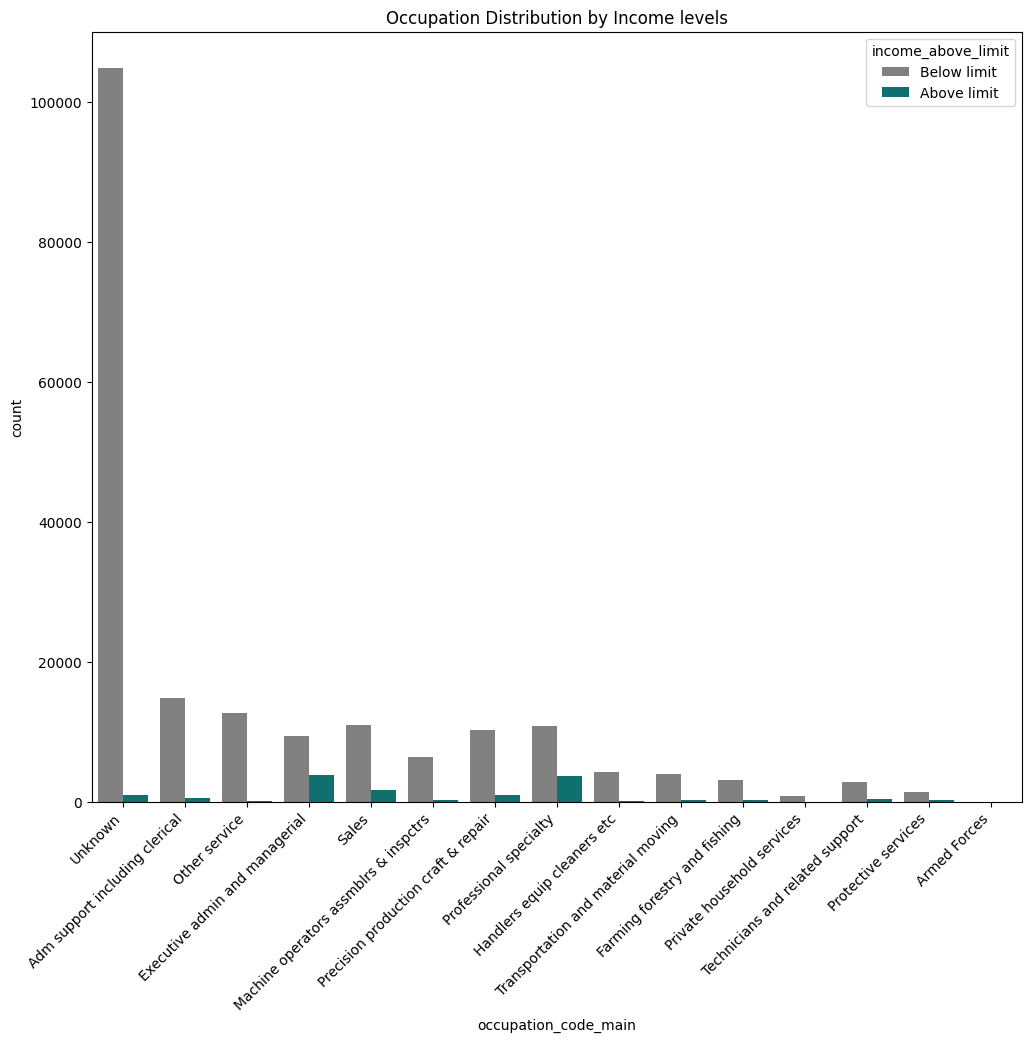

In [58]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x='occupation_code_main', hue='income_above_limit' ,palette=['grey', 'teal'])
plt.title('Occupation Distribution by Income levels')
plt.xticks(rotation=45, ha='right')
plt.show()

## Multivariate Analysis

In [59]:
# Encoding the target variable
df['income_mapped'] = df['income_above_limit'].map({'Below limit': 0, 'Above limit': 1})
df_corr = df.corr(numeric_only=True)

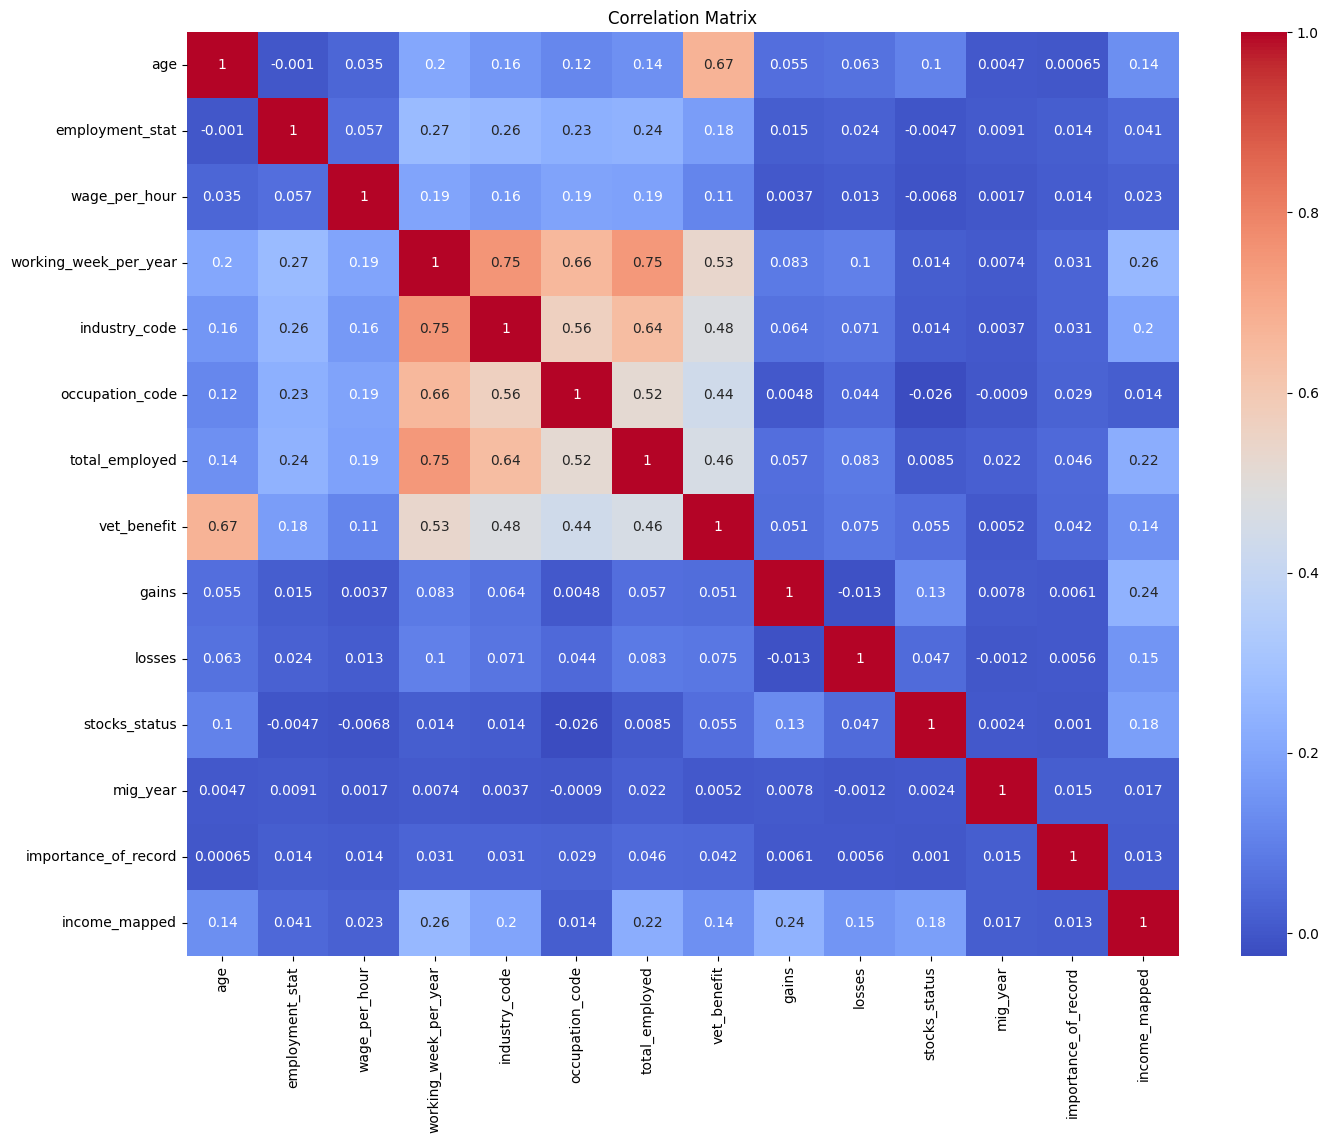

In [60]:
# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## __Hypothesis__
Null Hypothesis (H0): There's no clear connection between how much education someone has and the chance of making more money than a certain amount.

Alternative Hypothesis (H1): People with more education are much more likely to earn above that certain amount.

In [61]:
# Create a contingency table 
contingency_table = pd.crosstab(df['education'], df['income_above_limit'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Determine the significance level
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
    print("People with more education are much more likely to earn above that certain amount.")
else:
    print("Fail to reject the null hypothesis")
    print("There's no clear connection between how much education someone has and the chance of making more money than a certain amount")

Chi-square value: 31759.016113055117
P-value: 0.0
Reject the null hypothesis
People with more education are much more likely to earn above that certain amount.


## Chi-square Test Result

### Chi-square Value: 30485.39
The Chi-square value is a statistical measure obtained from the Chi-square test. In this case, the value is calculated to be 30485.39.

### P-value: 0.0
The P-value is a crucial indicator of the test's significance. A P-value of 0.0 suggests an extremely low probability of observing the data if the null hypothesis were true.

### Interpretation:
The Chi-square test was conducted to analyze the association between an individual's education level and the likelihood of earning above a certain threshold. The obtained Chi-square value of 30485.39 and a P-value of 0.0 indicate a statistically significant relationship.

### Conclusion:
With a P-value close to zero, we reject the null hypothesis. This leads to the conclusion that there is a significant association between an individual's education level and the likelihood of earning above the specified income threshold. The evidence suggests that people with higher education levels are much more likely to have incomes above the specified threshold.


# __Research Questions__

1. What is the distribution of income levels in the dataset, and what percentage of individuals exhibit incomes below a specific limit?

In [62]:
cols = df.select_dtypes(include=['int']).columns
cols = cols[cols != 'income_mapped']

Below Income levels: 6.20%


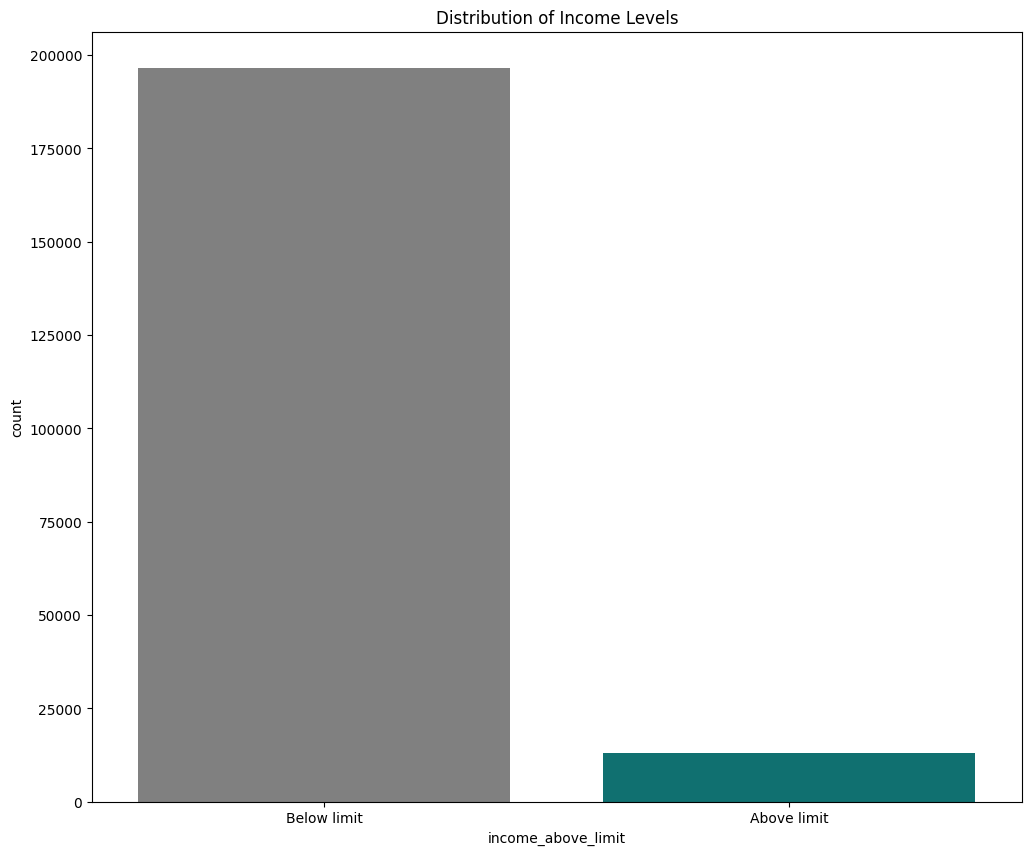

In [63]:
income_df = df['income_above_limit'].value_counts()
prevalence = income_df[1] / df.shape[0] * 100
print(f"Below Income levels: {prevalence:.2f}%")

plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='income_above_limit', palette=['grey', 'teal'])
plt.title('Distribution of Income Levels')
plt.show()

2. Are particular age groups more likely to have higher incomes, and can we identify age-related patterns in income levels?

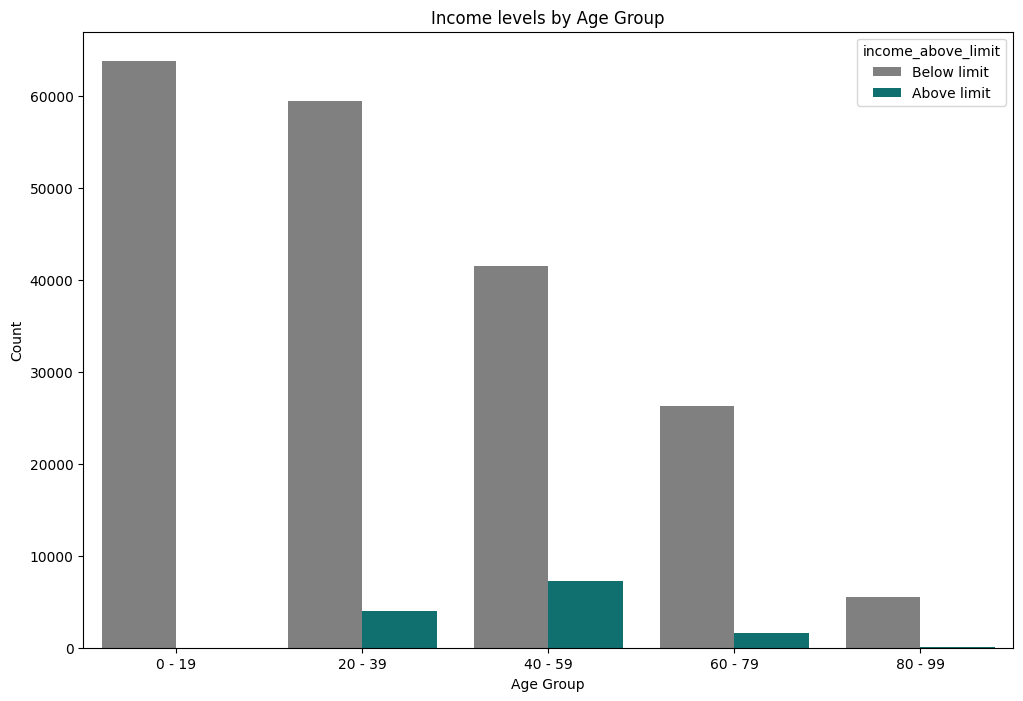

Age Group-wise Income levels:
income_above_limit  Income levels
age_group                        
0 - 19                   0.999922
20 - 39                  0.936771
40 - 59                  0.850522
60 - 79                  0.943651
80 - 99                  0.977848


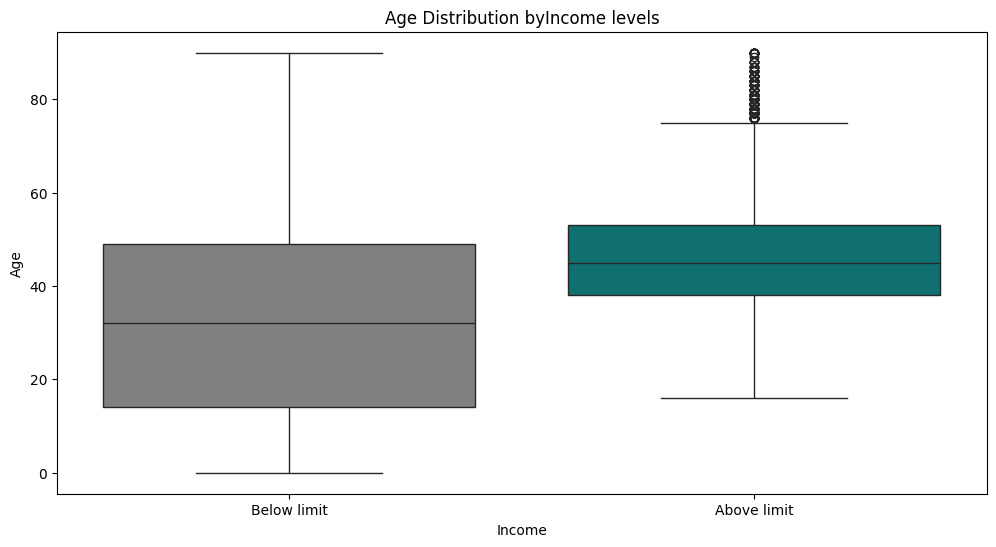

In [64]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', hue='income_above_limit', palette=['grey', 'teal'])
plt.title('Income levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

age_group_counts = df.groupby(['age_group', 'income_above_limit']).size().unstack()
age_group_counts['Income levels'] = age_group_counts['Below limit'] / (age_group_counts['Above limit'] + age_group_counts['Below limit'])

# Display the DataFrame showing income levels in each age group
print("Age Group-wise Income levels:")
print(age_group_counts[['Income levels']])

# Step 3: Visualize age-related patterns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income_above_limit', y='age', palette=['grey', 'teal'])
plt.title('Age Distribution byIncome levels')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

3. Do higher education levels correspond to a higher likelihood of having incomes above the specified threshold? 

In [65]:
education_income_df = df.groupby(['education', 'income_above_limit']).size().reset_index(name='count')

# Calculate the percentage count
total_counts_per_education = df.groupby('education').size()
education_income_df['percentage'] = (education_income_df['count'] / education_income_df['education'].map(total_counts_per_education) * 100)
education_income_df

,education,income_above_limit,count,percentage
0,Associates Degree,Above limit,822,8.103312
1,Associates Degree,Below limit,9322,91.896688
2,Bachelors Degree,Above limit,4154,19.800753
3,Bachelors Degree,Below limit,16825,80.199247
4,Children,Below limit,49685,100.000000
5,College Dropout,Above limit,1850,6.309686
6,College Dropout,Below limit,27470,93.690314
7,Doctorate,Above limit,679,51.517451
8,Doctorate,Below limit,639,48.482549
9,Elementary,Above limit,47,0.747455


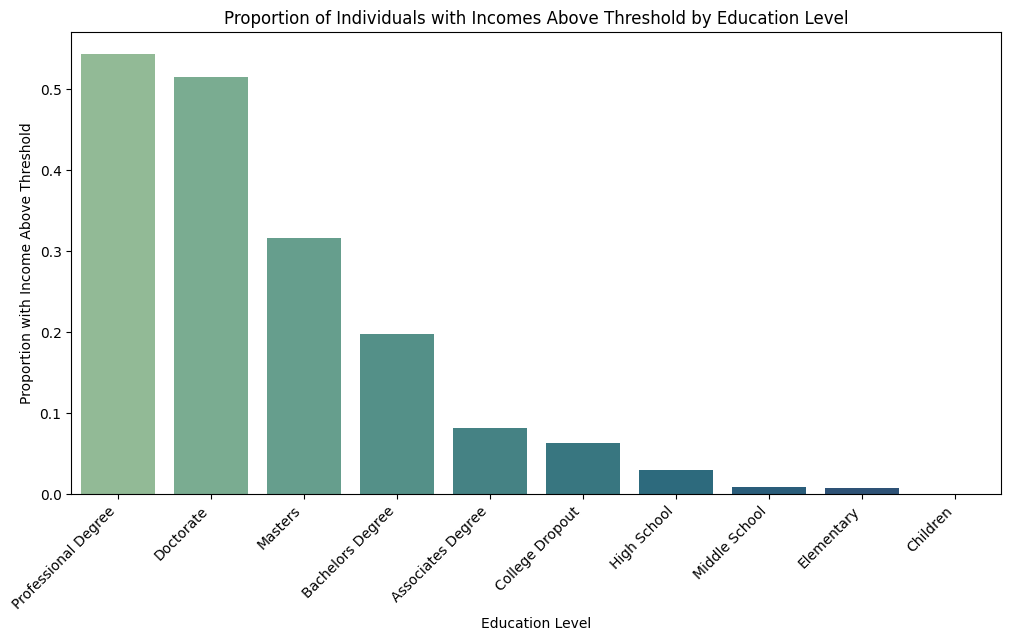

In [66]:
# Calculate the proportion of individuals with incomes above the threshold for each education level
education_income_proportion = df.groupby('education')['income_mapped'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=education_income_proportion.index, y=education_income_proportion.values, palette='crest')
plt.xlabel('Education Level')
plt.ylabel('Proportion with Income Above Threshold')
plt.title('Proportion of Individuals with Incomes Above Threshold by Education Level')
plt.xticks(rotation=45, ha='right')
plt.show()

4. What is the relationship between occupation and income categories in the dataset?

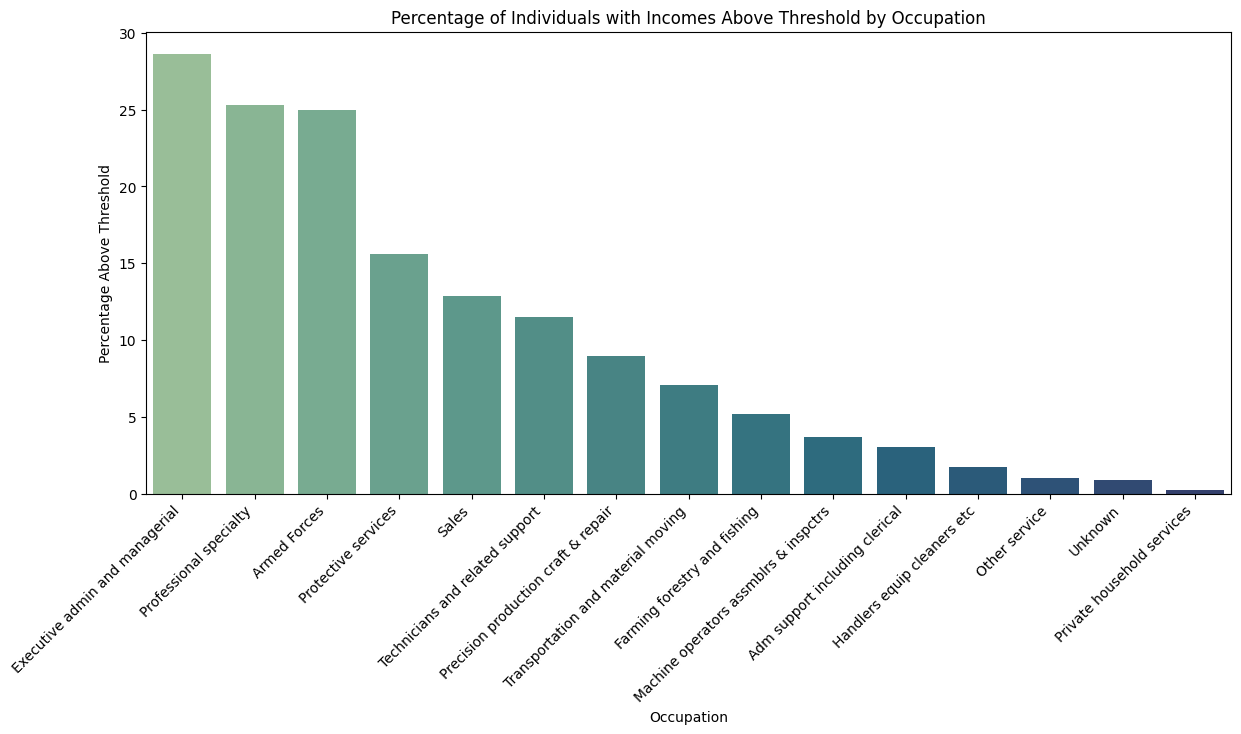

In [67]:
# Create a DataFrame with counts for Occupation vs. Income Levels
occupation_income_df = df.groupby(['occupation_code_main', 'income_mapped']).size().reset_index(name='count')

# Calculate the percentage count
total_counts_per_occupation = df.groupby('occupation_code_main').size()
occupation_income_df['percentage'] = (
    occupation_income_df['count'] / occupation_income_df['occupation_code_main'].map(total_counts_per_occupation) * 100)

# Filter data for individuals above the limit
above_limit_df = occupation_income_df[occupation_income_df['income_mapped'] == 1]

# Sort the DataFrame by percentage in descending order
above_limit_df = above_limit_df.sort_values('percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='occupation_code_main', y='percentage', data=above_limit_df, palette='crest', order=above_limit_df['occupation_code_main'])
plt.xlabel('Occupation')
plt.ylabel('Percentage Above Threshold')
plt.title('Percentage of Individuals with Incomes Above Threshold by Occupation')
plt.xticks(rotation=45, ha='right')
plt.show()


5. What is the relationship between industry and income categories in the dataset?

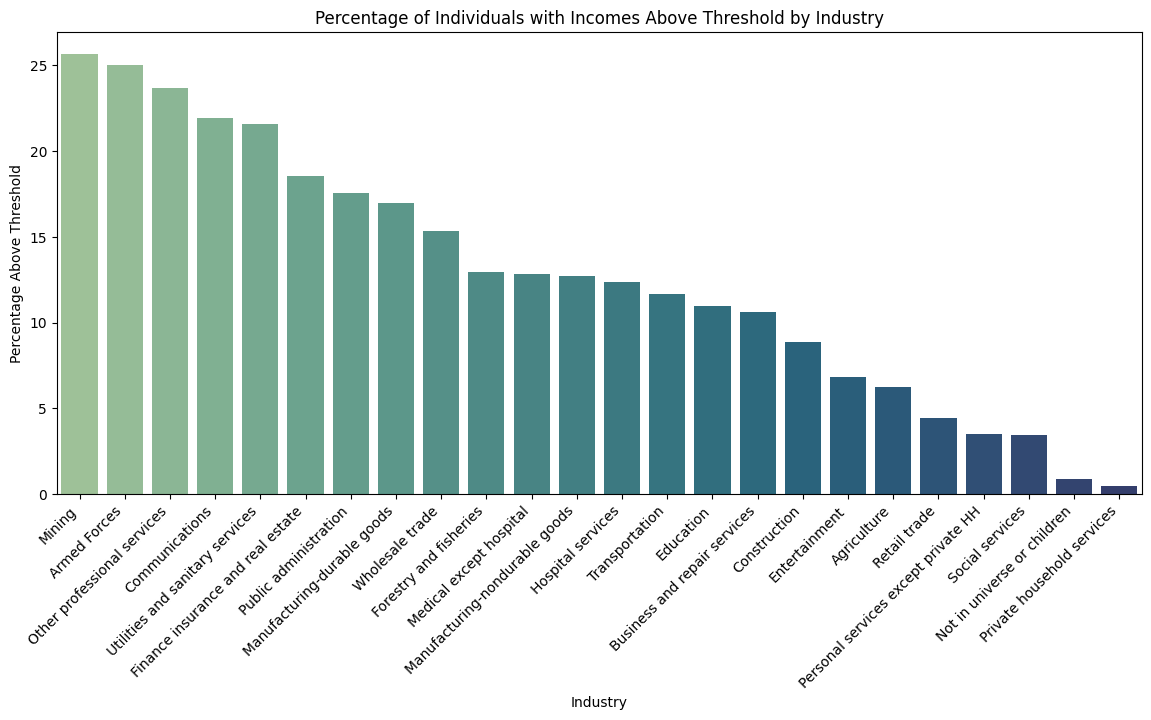

In [68]:
# Create a DataFrame with counts for Occupation vs. Income Levels
industry_income_df = df.groupby(['industry_code_main', 'income_mapped']).size().reset_index(name='count')

# Calculate the percentage count
total_counts_per_industry = df.groupby('industry_code_main').size()
industry_income_df['percentage'] = (
    industry_income_df['count'] / industry_income_df['industry_code_main'].map(total_counts_per_industry) * 100)

# Filter data for individuals above the limit
above_limit_df = industry_income_df[industry_income_df['income_mapped'] == 1]

# Sort the DataFrame by percentage in descending order
above_limit_df = above_limit_df.sort_values('percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='industry_code_main', y='percentage', data=above_limit_df, palette='crest', order=above_limit_df['industry_code_main'])
plt.xlabel('Industry')
plt.ylabel('Percentage Above Threshold')
plt.title('Percentage of Individuals with Incomes Above Threshold by Industry')
plt.xticks(rotation=45, ha='right')
plt.show()

6. Is there a significant gender-based income disparity in the dataset? 

In [69]:
education_income_df = df.groupby(['gender', 'income_above_limit']).size().reset_index(name='count')

# Calculate the percentage count
total_counts_per_education = df.groupby('gender').size()
education_income_df['percentage'] = (education_income_df['count'] / education_income_df['gender'].map(total_counts_per_education) * 100)
education_income_df

,gender,income_above_limit,count,percentage
0,Female,Above limit,2788,2.562877
1,Female,Below limit,105996,97.437123
2,Male,Above limit,10210,10.137517
3,Male,Below limit,90505,89.862483


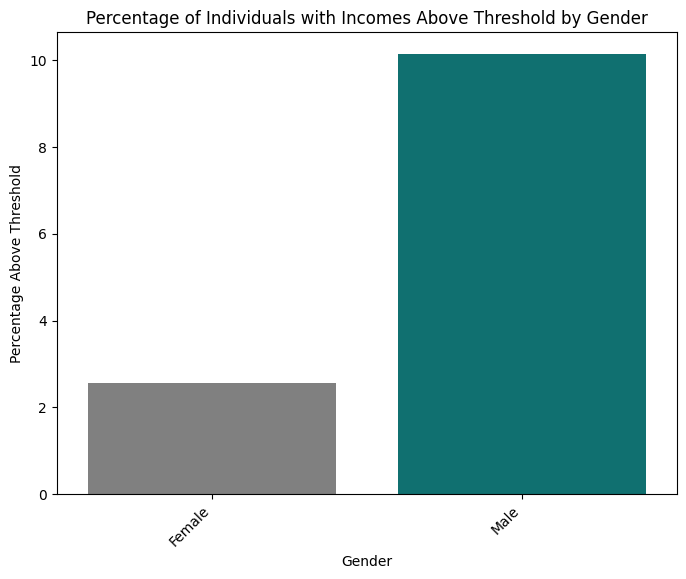

In [70]:
# Create a DataFrame with counts for Gender vs. Income Levels
gender_income_df = df.groupby(['gender', 'income_mapped']).size().reset_index(name='count')

# Calculate the percentage count
total_counts_per_gender = df.groupby('gender').size()
gender_income_df['percentage'] = (
    gender_income_df['count'] / gender_income_df['gender'].map(total_counts_per_gender) * 100)

# Filter data for individuals above the limit
above_limit_gender_df = gender_income_df[gender_income_df['income_mapped'] == 1]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='percentage', data=above_limit_gender_df, palette=['grey', 'teal'])
plt.xlabel('Gender')
plt.ylabel('Percentage Above Threshold')
plt.title('Percentage of Individuals with Incomes Above Threshold by Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

7. Are there differences in employment status between the two income groups (above and below limit)?

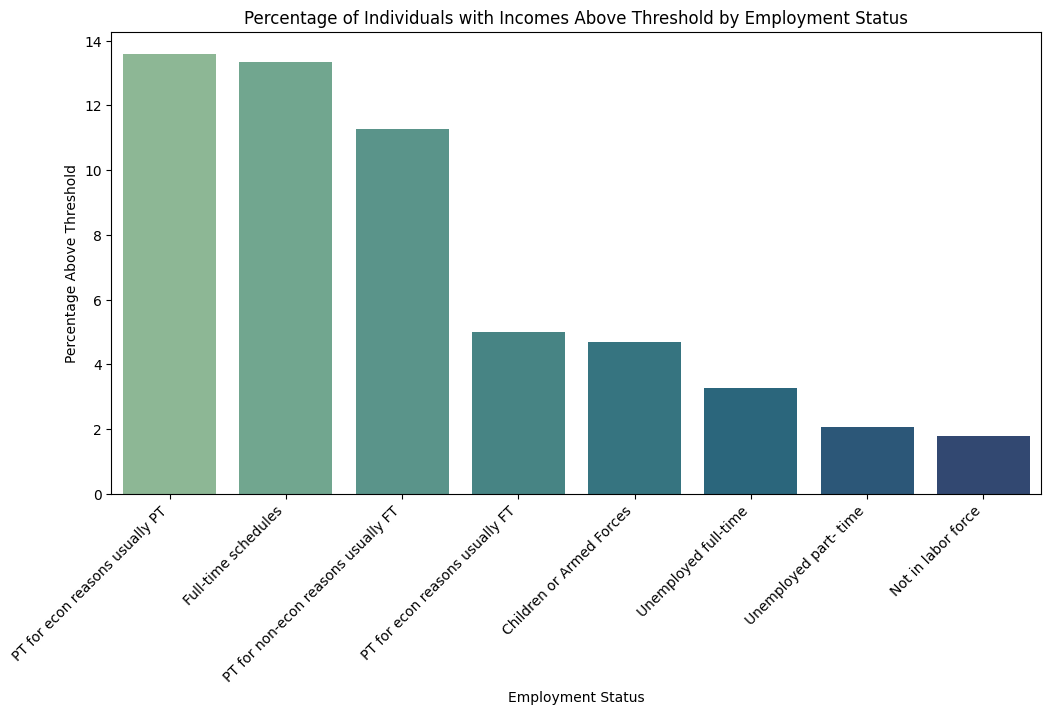

In [71]:
# Create a DataFrame with counts for Employment Status vs. Income Levels
employment_income_df = df.groupby(['employment_commitment', 'income_mapped']).size().reset_index(name='count')

# Calculate the percentage count
total_counts_per_employment = df.groupby('employment_commitment').size()
employment_income_df['percentage'] = (
    employment_income_df['count'] / employment_income_df['employment_commitment'].map(total_counts_per_employment) * 100)

# Filter data for individuals above the limit
above_limit_employment_df = employment_income_df[employment_income_df['income_mapped'] == 1]
above_limit_employment_df = above_limit_employment_df.sort_values(by='percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_commitment', y='percentage', data=above_limit_employment_df, palette='crest', order=above_limit_employment_df['employment_commitment'])
plt.xlabel('Employment Status')
plt.ylabel('Percentage Above Threshold')
plt.title('Percentage of Individuals with Incomes Above Threshold by Employment Status')
plt.xticks(rotation=45, ha='right')
plt.show()


8. How do race and ethnicity correlate with income levels in the dataset? 

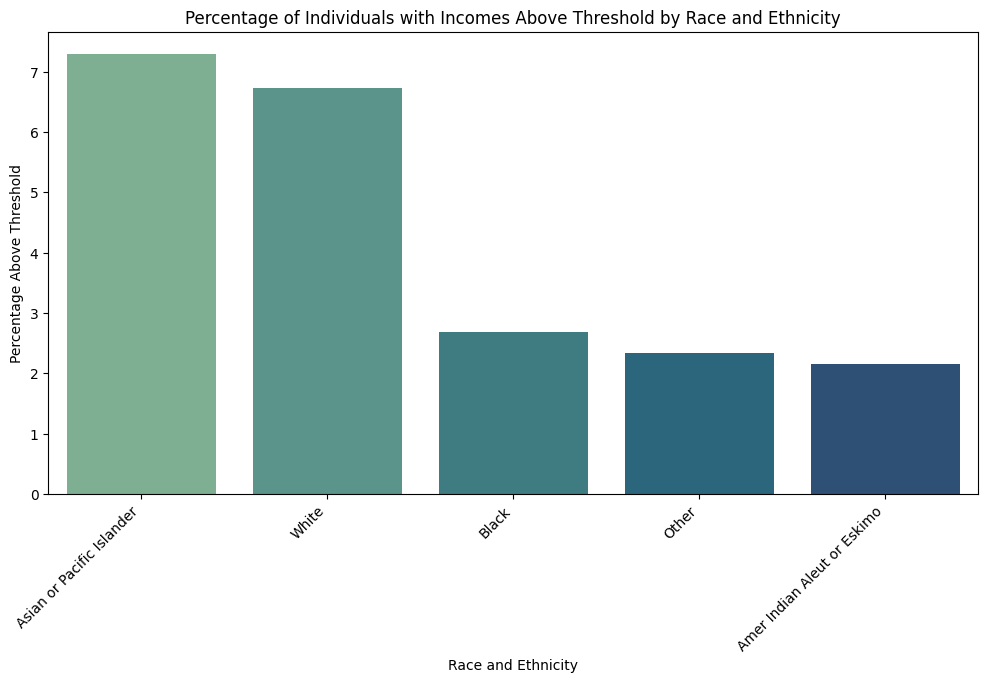

In [72]:
# Create a DataFrame with counts for Race and Ethnicity vs. Income Levels
race_income_df = df.groupby(['race', 'income_mapped']).size().reset_index(name='count')

# Calculate the percentage count
total_counts_per_race = df.groupby('race').size()
race_income_df['percentage'] = (
    race_income_df['count'] / race_income_df['race'].map(total_counts_per_race) * 100)

# Filter data for individuals above the limit
above_limit_race_df = race_income_df[race_income_df['income_mapped'] == 1]
above_limit_race_df = above_limit_race_df.sort_values(by='percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='race', y='percentage', data=above_limit_race_df, palette='crest')
plt.xlabel('Race and Ethnicity')
plt.ylabel('Percentage Above Threshold')
plt.title('Percentage of Individuals with Incomes Above Threshold by Race and Ethnicity')
plt.xticks(rotation=45, ha='right')
plt.show()


## __Data Preparation__

In [73]:
# Save the preprocessed datasets for PowerBI visualization
df.to_csv('../Data/df_visual.csv', index=False)

In [74]:
df.columns 

Index(['ID', 'age', 'gender', 'education', 'class', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'importance_of_record', 'income_above_limit',
       'age_group', 'income_mapped'],
      dtype='object')

In [75]:
df = df.drop(columns=['age_group','income_mapped','country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'mig_year', 'household_stat','ID'], axis=1)  

In [76]:
print_unique_categorical(df)

Column: gender
~~~~~~~~~~~~~~
Unique Values: ['Female' 'Male']

Column: education
~~~~~~~~~~~~~~~~~
Unique Values: ['High School' 'Children' 'Bachelors Degree' 'Middle School' 'Masters'
 'Associates Degree' 'Elementary' 'College Dropout' 'Professional Degree'
 'Doctorate']

Column: class
~~~~~~~~~~~~~
Unique Values: ['Private' 'Federal government' 'Never worked' 'Local government'
 'Self-employed-incorporated' 'Self-employed-not incorporated'
 'State government' 'Without pay']

Column: marital_status
~~~~~~~~~~~~~~~~~~~~~~
Unique Values: ['Widowed' 'Never married' 'Married-civilian spouse present' 'Divorced'
 'Married-spouse absent' 'Separated' 'Married-A F spouse present']

Column: race
~~~~~~~~~~~~
Unique Values: ['White' 'Black' 'Asian or Pacific Islander' 'Amer Indian Aleut or Eskimo'
 'Other']

Column: is_hispanic
~~~~~~~~~~~~~~~~~~~
Unique Values: ['All other' 'Mexican-American' 'Central or South American'
 'Mexican (Mexicano)' 'Puerto Rican' 'Other Spanish' 'Do not know' 'Cuban'

In [77]:
# Rename the column in train_df
df = df.rename(columns={'class': 'worker_class'})

# Rename the column in test_df
df_test = df_test.rename(columns={'class': 'worker_class'})

In [78]:
# Define your features (X) and target variable (y)
X = df.drop('income_above_limit', axis=1)
y = df['income_above_limit']

In [79]:
binary_features = ['gender', 'citizenship']

nominal_features = ['race', 'is_hispanic', 'worker_class', 'marital_status', 'education', 'industry_code_main', 'employment_commitment', 'occupation_code_main', 'household_summary', 'tax_status']

In [80]:
# Creating transformers for each type of encoding
binary_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary'))
])

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('nominal', nominal_transformer, nominal_features)
    ])

In [81]:
# Balance the training set using Random Oversampling
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(X, y)

# Check the class distribution after balancing
balanced_class_counts = y_train_resampled.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
income_above_limit
Below limit    196501
Above limit    196501
Name: count, dtype: int64


In [82]:
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(x_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (314401, 24) (314401,)
Shape of the Evaluation Set (X_eval, y_eval): (78601, 24) (78601,)


In [83]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

In [84]:
# List of models
models = [RandomForestClassifier(random_state=42, n_jobs=-1), 
          CatBoostClassifier(random_state=42),
          XGBClassifier(random_state=42, n_jobs=-1),
          LGBMClassifier(random_state=42)]

metrics = []

# Iterating over models
for model in models:
    # Create a pipeline with the preprocessor, scaler, and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', MinMaxScaler()),
                               ('model', model)])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_eval)

    # Calculate the metrics
    acc = accuracy_score(y_eval_encoded, y_pred)
    f1 = f1_score(y_eval_encoded, y_pred)
    roc = roc_auc_score(y_eval_encoded, y_pred)
    pr = precision_score(y_eval_encoded, y_pred)
    rc = recall_score(y_eval_encoded, y_pred)

    # Append the metrics to the list
    metrics.append({"Model": model.__class__.__name__,
                    "Accuracy Score": acc,
                    "F1 Score": f1,
                    "ROC AUC Score": roc,
                    "Precision Score": pr,
                    "Recall Score": rc})

# Creating a DataFrame for the overall performance
overall = pd.DataFrame(metrics)
overall = overall.sort_values(by="F1 Score", ascending=False)
overall_styled = overall.style.background_gradient(cmap="winter")
overall_styled

Learning rate set to 0.120049
0:	learn: 0.6027808	total: 245ms	remaining: 4m 4s
1:	learn: 0.5385622	total: 292ms	remaining: 2m 25s
2:	learn: 0.4991929	total: 351ms	remaining: 1m 56s
3:	learn: 0.4715426	total: 415ms	remaining: 1m 43s
4:	learn: 0.4512951	total: 475ms	remaining: 1m 34s
5:	learn: 0.4342133	total: 531ms	remaining: 1m 27s
6:	learn: 0.4185143	total: 584ms	remaining: 1m 22s
7:	learn: 0.4079538	total: 634ms	remaining: 1m 18s
8:	learn: 0.3974774	total: 674ms	remaining: 1m 14s
9:	learn: 0.3913758	total: 734ms	remaining: 1m 12s
10:	learn: 0.3850448	total: 773ms	remaining: 1m 9s
11:	learn: 0.3802479	total: 825ms	remaining: 1m 7s
12:	learn: 0.3764084	total: 886ms	remaining: 1m 7s
13:	learn: 0.3732720	total: 947ms	remaining: 1m 6s
14:	learn: 0.3706733	total: 1.01s	remaining: 1m 6s
15:	learn: 0.3681934	total: 1.06s	remaining: 1m 5s
16:	learn: 0.3655654	total: 1.11s	remaining: 1m 4s
17:	learn: 0.3629167	total: 1.16s	remaining: 1m 3s
18:	learn: 0.3614620	total: 1.21s	remaining: 1m 2s
19

,Model,Accuracy Score,F1 Score,ROC AUC Score,Precision Score,Recall Score
0,RandomForestClassifier,0.922685,0.919846,0.922685,0.954898,0.887277
1,CatBoostClassifier,0.889760,0.885182,0.889759,0.923521,0.849898
2,XGBClassifier,0.870256,0.865362,0.870256,0.899270,0.833919
3,LGBMClassifier,0.856872,0.852304,0.856872,0.880391,0.825954


In [85]:
# List of models
models = [RandomForestClassifier(random_state=42, n_jobs=-1), CatBoostClassifier(random_state=42),
          XGBClassifier(random_state=42, n_jobs=-1)]

# Iterating over models
for model in models:
    # Create a pipeline with the preprocessor, scaler, and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', MinMaxScaler()),
                               ('model', model)])
    # Fit the model
    pipeline.fit(X_train, y_train_encoded)

    # Predict on the test set
    y_pred = pipeline.predict(X_eval)

    # Print the classification report
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_eval_encoded, y_pred))

    # Generate and display the confusion matrix
    fig = px.imshow(confusion_matrix(y_eval_encoded, y_pred), color_continuous_scale='twilight',
                    title="Confusion Matrix of " + model.__class__.__name__,
                    labels=dict(x="Predicted", y="Actual", color="Counts"),
                    color_continuous_midpoint=0.8, width=400, height=400,
                    template="plotly_dark", text_auto=True)
    fig.show()

    print("----------------------------------------------------------")


Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93     39301
           1       0.95      0.89      0.92     39300

    accuracy                           0.92     78601
   macro avg       0.92      0.92      0.92     78601
weighted avg       0.92      0.92      0.92     78601



----------------------------------------------------------
Learning rate set to 0.120049
0:	learn: 0.6027808	total: 42.7ms	remaining: 42.7s
1:	learn: 0.5385622	total: 84.1ms	remaining: 42s
2:	learn: 0.4991929	total: 123ms	remaining: 40.9s
3:	learn: 0.4715426	total: 163ms	remaining: 40.6s
4:	learn: 0.4512951	total: 199ms	remaining: 39.5s
5:	learn: 0.4342133	total: 245ms	remaining: 40.5s
6:	learn: 0.4185143	total: 281ms	remaining: 39.8s
7:	learn: 0.4079538	total: 316ms	remaining: 39.2s
8:	learn: 0.3974774	total: 350ms	remaining: 38.6s
9:	learn: 0.3913758	total: 388ms	remaining: 38.4s
10:	learn: 0.3850448	total: 422ms	remaining: 38s
11:	learn: 0.3802479	total: 459ms	remaining: 37.8s
12:	learn: 0.3764084	total: 497ms	remaining: 37.8s
13:	learn: 0.3732720	total: 530ms	remaining: 37.3s
14:	learn: 0.3706733	total: 565ms	remaining: 37.1s
15:	learn: 0.3681934	total: 599ms	remaining: 36.8s
16:	learn: 0.3655654	total: 635ms	remaining: 36.7s
17:	learn: 0.3629167	total: 675ms	remaining: 36.8s
18:	l

----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.87     39301
           1       0.90      0.83      0.87     39300

    accuracy                           0.87     78601
   macro avg       0.87      0.87      0.87     78601
weighted avg       0.87      0.87      0.87     78601



----------------------------------------------------------


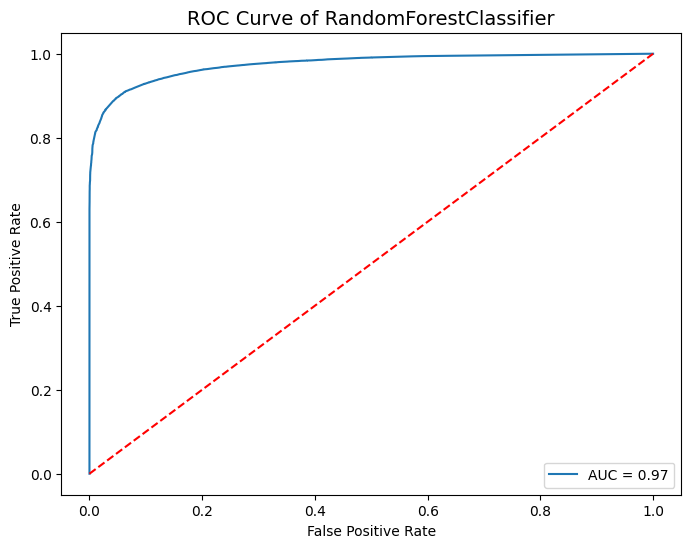

Learning rate set to 0.120049
0:	learn: 0.6027808	total: 46.5ms	remaining: 46.4s
1:	learn: 0.5385622	total: 88.1ms	remaining: 43.9s
2:	learn: 0.4991929	total: 127ms	remaining: 42.4s
3:	learn: 0.4715426	total: 171ms	remaining: 42.5s
4:	learn: 0.4512951	total: 213ms	remaining: 42.4s
5:	learn: 0.4342133	total: 254ms	remaining: 42s
6:	learn: 0.4185143	total: 293ms	remaining: 41.5s
7:	learn: 0.4079538	total: 333ms	remaining: 41.3s
8:	learn: 0.3974774	total: 370ms	remaining: 40.8s
9:	learn: 0.3913758	total: 428ms	remaining: 42.4s
10:	learn: 0.3850448	total: 466ms	remaining: 41.9s
11:	learn: 0.3802479	total: 504ms	remaining: 41.5s
12:	learn: 0.3764084	total: 542ms	remaining: 41.1s
13:	learn: 0.3732720	total: 578ms	remaining: 40.7s
14:	learn: 0.3706733	total: 618ms	remaining: 40.6s
15:	learn: 0.3681934	total: 656ms	remaining: 40.3s
16:	learn: 0.3655654	total: 693ms	remaining: 40.1s
17:	learn: 0.3629167	total: 732ms	remaining: 39.9s
18:	learn: 0.3614620	total: 769ms	remaining: 39.7s
19:	learn: 

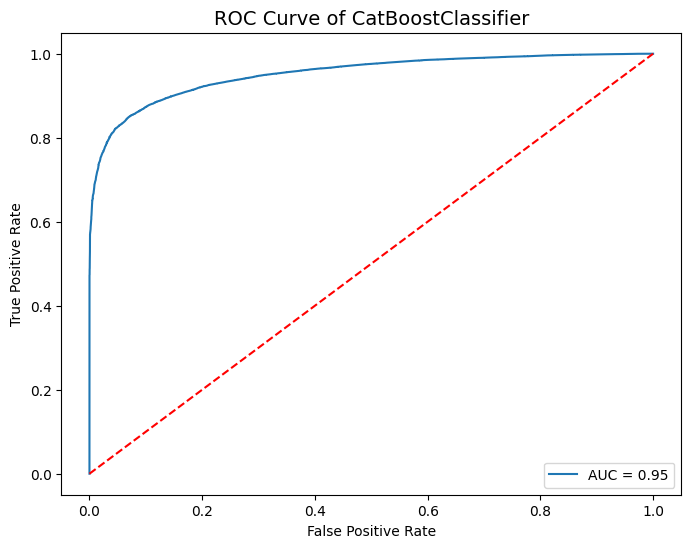

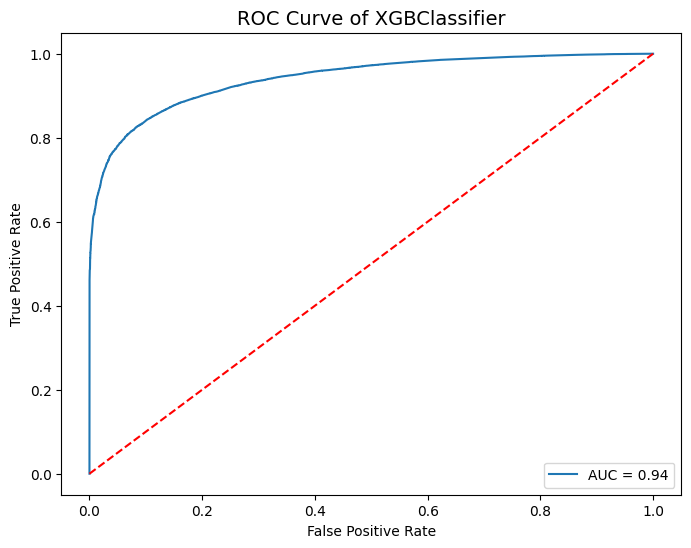

In [86]:
# List of models
models = [RandomForestClassifier(random_state=42, n_jobs=-1), CatBoostClassifier(random_state=42),
          XGBClassifier(random_state=42, n_jobs=-1)]

# Iterating over models
for model in models:
    # Create a pipeline with the preprocessor, scaler, and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', MinMaxScaler()),
                               ('model', model)])
    # Fit the model on your training data before making predictions
    pipeline.fit(X_train, y_train_encoded)
    
    # ROC Curve:
    y_prob = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc_score(y_eval_encoded, y_prob))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.legend(loc='lower right')
    plt.title("ROC Curve of " + model.__class__.__name__, size=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [87]:
'''# Define the models
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
cb = CatBoostClassifier(random_state=42)


# Define hyperparameter grids for each model
rfc_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False]
}

cb_params = {
    'model__iterations': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__depth': [4, 6, 10]
}

# Create lists of pipelines (with models) and their corresponding parameter grids
pipelines = [
    Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler()), ('model', rfc)]),
    Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler()), ('model', cb)])   
]

params = [rfc_params, cb_params]

# Perform grid search for each model
for pipeline, param_grid in zip(pipelines, params):
    grid_cv = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
    grid_cv.fit(X_train, y_train_encoded)
    
    print(pipeline['model'].__class__.__name__, "Best params:", grid_cv.best_params_)'''

'# Define the models\nrfc = RandomForestClassifier(random_state=42, n_jobs=-1)\ncb = CatBoostClassifier(random_state=42)\n\n\n# Define hyperparameter grids for each model\nrfc_params = {\n    \'model__n_estimators\': [100, 200, 300],\n    \'model__max_depth\': [None, 10, 20],\n    \'model__min_samples_split\': [2, 5, 10],\n    \'model__min_samples_leaf\': [1, 2, 4],\n    \'model__max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'model__bootstrap\': [True, False]\n}\n\ncb_params = {\n    \'model__iterations\': [100, 200, 300],\n    \'model__learning_rate\': [0.01, 0.1, 0.2],\n    \'model__depth\': [4, 6, 10]\n}\n\n# Create lists of pipelines (with models) and their corresponding parameter grids\npipelines = [\n    Pipeline(steps=[(\'preprocessor\', preprocessor), (\'scaler\', MinMaxScaler()), (\'model\', rfc)]),\n    Pipeline(steps=[(\'preprocessor\', preprocessor), (\'scaler\', MinMaxScaler()), (\'model\', cb)])   \n]\n\nparams = [rfc_params, cb_params]\n\n# Perform grid search fo

In [88]:
# Initialize the RandomForestClassifier within a pipeline
pipeline_rfc = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', MinMaxScaler()),
                               ('model', RandomForestClassifier(random_state=42, n_jobs=-1))])

# Fit the pipeline on the training data
pipeline_rfc.fit(X_train, y_train_encoded)

# Predict probabilities for the positive class
train_prob = pipeline_rfc.predict_proba(X_train)[:, 1]
eval_prob = pipeline_rfc.predict_proba(X_eval)[:, 1]

# Apply the threshold
thresh = 0.4
train_pred = np.where(train_prob > thresh, 1, 0)
eval_pred = np.where(eval_prob > thresh, 1, 0)

# Classification reports
print('\n')
print('The classification report only on the evaluation data is below-')
print(classification_report(y_eval_encoded, eval_pred))

print('The classification report only on the train data is below-')
print(classification_report(y_train_encoded, train_pred))



The classification report only on the evaluation data is below-
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     39301
           1       0.94      0.91      0.92     39300

    accuracy                           0.92     78601
   macro avg       0.92      0.92      0.92     78601
weighted avg       0.92      0.92      0.92     78601

The classification report only on the train data is below-
              precision    recall  f1-score   support

           0       0.92      0.94      0.93    157200
           1       0.94      0.92      0.93    157201

    accuracy                           0.93    314401
   macro avg       0.93      0.93      0.93    314401
weighted avg       0.93      0.93      0.93    314401



## Saving the Pipeline and the Encoder

In [89]:
# Save the pipeline to a file
with open('../SRC/Assets/rfc_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline_rfc, file)


# Save the Encoder to a file 
with open('../SRC/Assets/encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

Test Predictions

In [90]:
df_test_copy = df_test.drop(columns=['country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'mig_year','ID', 'household_stat'], axis=1)

In [91]:
# Perform predictions using the loaded pipeline
predictions = pipeline_rfc.predict(df_test_copy)

# Add the predictions as a new column to df_test
df_test_copy['income_above_limit'] = predictions

In [92]:
# Merge the 'test_df' and 'test_predictions' based on the common column 'ID'
merged_df = pd.DataFrame(data=predictions, columns=['income_above_limit']).merge(df_test[['ID']], left_index=True, right_index=True)

# Now 'merged_df' contains the 'ID' column in addition to the data from 'test_predictions'
results = merged_df[['ID', 'income_above_limit']]
results.head(10)


,ID,income_above_limit
0,ID_TZ209499,0
1,ID_TZ209500,1
2,ID_TZ209501,0
3,ID_TZ209502,1
4,ID_TZ209503,1
5,ID_TZ209504,1
6,ID_TZ209505,1
7,ID_TZ209506,1
8,ID_TZ209507,1
9,ID_TZ209508,1


In [93]:
# Save the results dataframe to a csv file.
results.to_csv('../Data/submission.csv', index=False)

In [94]:
df.head()

,age,gender,education,worker_class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,importance_of_record,income_above_limit
0,79,Female,High School,Private,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,Unknown,2,Householder,2,Head of household,0,0,292,citizen,1779.74,Below limit
1,65,Female,High School,Private,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,Unknown,0,Householder,2,Single,0,0,0,citizen,2366.75,Below limit
2,21,Male,High School,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,Adm support including clerical,4,Child 18 or older,2,Single,0,0,0,citizen,1693.42,Below limit
3,2,Female,Children,Never worked,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,Unknown,0,Child under 18 never married,0,Nonfiler,0,0,0,citizen,1380.27,Below limit
4,70,Male,High School,Private,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,Unknown,0,Spouse of householder,2,Joint both 65+,0,0,0,citizen,1580.79,Below limit
